In [1]:
import fastwer
import jiwer
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display
import pandas
import pytesseract
from pytesseract import Output
import cv2
from statistics import mean


pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [2]:
str_nb = ['UTM_N','UTM_E']
str_lngTxt = ['Classification', 'Company' , 'Address']
str_shortTxt = ['Datum','Fuse']

In [37]:
less_90 = ['2012_0_Address.jpg', '2012_1000_Company Name.jpg', '2012_1001_Address.jpg',
           '2012_1003_Address.jpg', '2012_1004_Address.jpg', '2012_1005_Address.jpg', 
           '2012_1006_Address.jpg', '2012_1008_Address.jpg', '2012_1009_Address.jpg',
           '2012_100_Address.jpg', '2012_1011_Address.jpg', '2012_1012_Address.jpg', '2012_1013_Address.jpg', '2012_1015_Address.jpg', '2012_1016_Address.jpg', '2012_1017_Address.jpg', '2012_1018_Address.jpg', '2012_1019_Address.jpg', '2012_101_Address.jpg', '2012_1020_Address.jpg', '2012_1022_Address.jpg', '2012_1023_Address.jpg', '2012_1024_Address.jpg', '2012_1025_Address.jpg', '2012_1026_Address.jpg', '2012_1028_Address.jpg', '2012_1029_Address.jpg', '2012_102_Address.jpg', '2012_1031_Address.jpg', '2012_1032_Address.jpg', '2012_1033_Address.jpg', '2012_1034_Address.jpg', '2012_1035_Address.jpg', '2012_1036_Address.jpg', '2012_1037_Address.jpg', '2012_1038_Address.jpg', '2012_1039_Address.jpg', '2012_1040_Address.jpg', '2012_1041_Address.jpg', '2012_1042_Address.jpg', '2012_1043_Address.jpg', '2012_1044_Address.jpg', '2012_1045_Address.jpg', '2012_1046_Address.jpg', '2012_1047_Address.jpg', '2012_1048_Address.jpg', '2012_104_Address.jpg', '2012_1050_Address.jpg', '2012_1051_Address.jpg', '2012_1053_Address.jpg', '2012_1054_Address.jpg', '2012_1055_Address.jpg', '2012_1058_Address.jpg', '2012_1059_Address.jpg', '2012_1059_Company Name.jpg', '2012_105_Address.jpg', '2012_1062_Address.jpg', '2012_1063_Address.jpg', '2012_1064_Address.jpg', '2012_1066_Company Name.jpg', '2012_1067_Address.jpg', '2012_1068_Address.jpg', '2012_1069_Address.jpg', '2012_106_Address.jpg', '2012_1070_Address.jpg', '2012_1072_Address.jpg', '2012_1074_Address.jpg', '2012_1075_Address.jpg', '2012_1076_Address.jpg', '2012_1077_Address.jpg', '2012_1078_Address.jpg', '2012_107_Address.jpg', '2012_1080_Address.jpg', '2012_1081_Address.jpg', '2012_1082_Address.jpg', '2012_1083_Address.jpg', '2012_1085_Address.jpg', '2012_1086_Address.jpg', '2012_1088_Address.jpg', '2012_1088_Company Name.jpg', '2012_1089_Address.jpg', '2012_108_Address.jpg', '2012_1090_Address.jpg', '2012_1092_Address.jpg', '2012_1093_Address.jpg', '2012_1095_Address.jpg', '2012_1097_Address.jpg', '2012_1098_Address.jpg', '2012_1099_Address.jpg', '2012_10_Address.jpg', '2012_1100_Address.jpg', '2012_1101_Address.jpg', '2012_1102_Address.jpg', '2012_1103_Address.jpg', '2012_1104_Address.jpg', '2012_1105_Address.jpg', '2012_1106_Address.jpg', '2012_1107_Address.jpg', '2012_1108_Address.jpg', '2012_110_Address.jpg', '2012_1110_Address.jpg', '2012_1111_Address.jpg', '2012_1112_Company Name.jpg', '2012_1113_Address.jpg', '2012_1114_Address.jpg', '2012_1116_Address.jpg', '2012_1118_Address.jpg', '2012_1119_Address.jpg', '2012_111_Address.jpg', '2012_1121_Address.jpg', '2012_1122_Address.jpg', '2012_1123_Address.jpg', '2012_1124_Address.jpg', '2012_1125_Address.jpg', '2012_1126_Address.jpg', '2012_1127_Address.jpg', '2012_1128_Company Name.jpg', '2012_1129_Address.jpg', '2012_112_Address.jpg', '2012_112_Company Name.jpg', '2012_1130_Address.jpg', '2012_1130_Company Name.jpg', '2012_1131_Address.jpg', '2012_1132_Address.jpg', '2012_1135_Address.jpg', '2012_1136_Address.jpg', '2012_1137_Address.jpg', '2012_1138_Address.jpg', '2012_1139_Address.jpg', '2012_113_Address.jpg', '2012_1140_Address.jpg', '2012_1141_Address.jpg', '2012_1142_Address.jpg', '2012_1143_Address.jpg', '2012_1144_Address.jpg', '2012_1145_Address.jpg', '2012_1146_Address.jpg', '2012_1148_Address.jpg', '2012_1149_Address.jpg', '2012_114_Address.jpg', '2012_1151_Address.jpg', '2012_1153_Address.jpg', '2012_1154_Address.jpg', '2012_1155_Address.jpg', '2012_1157_Address.jpg', '2012_1158_Address.jpg', '2012_1159_Address.jpg', '2012_115_Address.jpg', '2012_1160_Address.jpg', '2012_1161_Address.jpg', '2012_1162_Address.jpg', '2012_1162_Company Name.jpg', '2012_1163_Address.jpg', '2012_1164_Address.jpg', '2012_1165_Address.jpg', '2012_1165_Company Name.jpg', '2012_1166_Address.jpg', '2012_1167_Address.jpg', '2012_1168_Address.jpg', '2012_1169_Address.jpg', '2012_116_Address.jpg', '2012_1171_Address.jpg', '2012_1172_Address.jpg', '2012_1176_Address.jpg', '2012_1177_Address.jpg', '2012_117_Address.jpg', '2012_1180_Address.jpg', '2012_1181_Address.jpg', '2012_1182_Address.jpg', '2012_1183_Address.jpg', '2012_1185_Address.jpg', '2012_1186_Address.jpg', '2012_1187_Address.jpg', '2012_1188_Address.jpg', '2012_1189_Address.jpg', '2012_118_Address.jpg', '2012_1190_Address.jpg', '2012_1194_Address.jpg', '2012_1195_Address.jpg', '2012_119_Address.jpg', '2012_11_Address.jpg', '2012_1200_Address.jpg', '2012_1201_Address.jpg', '2012_1202_Address.jpg', '2012_1203_Address.jpg', '2012_1204_Address.jpg', '2012_1205_Address.jpg', '2012_1206_Address.jpg', '2012_1207_Address.jpg', '2012_1208_Address.jpg', '2012_1209_Address.jpg', '2012_120_Address.jpg', '2012_1211_Address.jpg', '2012_1212_Address.jpg', '2012_1213_Address.jpg', '2012_1214_Address.jpg', '2012_1215_Address.jpg', '2012_1216_Address.jpg', '2012_1217_Address.jpg', '2012_1219_Address.jpg', '2012_121_Address.jpg', '2012_1220_Address.jpg', '2012_1221_Address.jpg', '2012_1222_Address.jpg', '2012_1223_Address.jpg', '2012_1224_Address.jpg', '2012_1227_Address.jpg', '2012_1230_Address.jpg', '2012_1231_Address.jpg', '2012_1232_Address.jpg', '2012_1233_Address.jpg', '2012_1235_Address.jpg', '2012_1236_Address.jpg', '2012_1238_Address.jpg', '2012_1242_Address.jpg', '2012_1242_Company Name.jpg', '2012_1243_Address.jpg', '2012_1245_Address.jpg', '2012_1246_Address.jpg', '2012_1247_Address.jpg', '2012_1248_Address.jpg', '2012_1249_Address.jpg', '2012_1250_Address.jpg', '2012_1251_Address.jpg', '2012_1252_Address.jpg', '2012_1253_Address.jpg', '2012_1255_Address.jpg', '2012_1256_Address.jpg', '2012_1257_Address.jpg', '2012_1259_Address.jpg', '2012_125_Address.jpg', '2012_1260_Address.jpg', '2012_1261_Address.jpg', '2012_1264_Address.jpg', '2012_1265_Address.jpg', '2012_1267_Address.jpg', '2012_1269_Address.jpg', '2012_126_Address.jpg', '2012_1270_Address.jpg', '2012_1271_Address.jpg', '2012_1273_Address.jpg', '2012_1274_Address.jpg', '2012_1275_Address.jpg', '2012_1276_Address.jpg', '2012_1277_Address.jpg', '2012_1278_Address.jpg', '2012_1279_Address.jpg', '2012_127_Address.jpg', '2012_1280_Address.jpg', '2012_1282_Address.jpg', '2012_1283_Address.jpg', '2012_1284_Address.jpg', '2012_1285_Address.jpg', '2012_1286_Address.jpg', '2012_1287_Address.jpg', '2012_1288_Address.jpg', '2012_1289_Address.jpg', '2012_128_Address.jpg', '2012_128_Company Name.jpg', '2012_1291_Address.jpg', '2012_1292_Address.jpg', '2012_1293_Company Name.jpg', '2012_1296_Address.jpg', '2012_1297_Address.jpg', '2012_1298_Address.jpg', '2012_1299_Address.jpg', '2012_129_Address.jpg', '2012_12_Address.jpg', '2012_1300_Address.jpg', '2012_1301_Address.jpg', '2012_1303_Address.jpg', '2012_1305_Address.jpg', '2012_1306_Address.jpg', '2012_1307_Address.jpg', '2012_1308_Address.jpg', '2012_1309_Address.jpg', '2012_1310_Address.jpg', '2012_1311_Address.jpg', '2012_1312_Address.jpg', '2012_1312_Classification.jpg', '2012_1313_Address.jpg', '2012_1314_Address.jpg', '2012_1316_Address.jpg', '2012_1317_Address.jpg', '2012_1319_Address.jpg', '2012_1320_Address.jpg', '2012_1321_Address.jpg', '2012_1323_Address.jpg', '2012_1324_Address.jpg', '2012_1325_Address.jpg', '2012_1328_Address.jpg', '2012_1329_Address.jpg', '2012_1330_Company Name.jpg', '2012_1331_Address.jpg', '2012_1333_Address.jpg', '2012_1334_Address.jpg', '2012_1334_Company Name.jpg', '2012_1335_Address.jpg', '2012_1336_Address.jpg', '2012_1338_Address.jpg', '2012_1339_Address.jpg', '2012_133_Address.jpg', '2012_1340_Address.jpg', '2012_1341_Address.jpg', '2012_1342_Address.jpg', '2012_1343_Address.jpg', '2012_1345_Address.jpg', '2012_1348_Address.jpg', '2012_1349_Address.jpg', '2012_134_Address.jpg', '2012_1350_Address.jpg', '2012_1350_Company Name.jpg', '2012_1352_Address.jpg', '2012_1353_Address.jpg', '2012_1355_Address.jpg', '2012_1356_Address.jpg', '2012_1357_Address.jpg', '2012_1359_Address.jpg', '2012_135_Address.jpg', '2012_1360_Address.jpg', '2012_1360_Company Name.jpg', '2012_1361_Address.jpg', '2012_1362_Address.jpg', '2012_1363_Address.jpg', '2012_1365_Address.jpg', '2012_1366_Address.jpg', '2012_1368_Address.jpg', '2012_136_Address.jpg', '2012_1371_Address.jpg', '2012_1373_Address.jpg', '2012_1375_Address.jpg', '2012_1376_Address.jpg', '2012_1377_Address.jpg', '2012_137_Address.jpg', '2012_1380_Address.jpg', '2012_1381_Address.jpg', '2012_1382_Address.jpg', '2012_1383_Address.jpg', '2012_1384_Address.jpg', '2012_1385_Address.jpg', '2012_1386_Address.jpg', '2012_1387_Address.jpg', '2012_1388_Address.jpg', '2012_138_Address.jpg', '2012_1390_Address.jpg', '2012_1391_Address.jpg', '2012_1392_Company Name.jpg', '2012_1394_Address.jpg', '2012_1396_Address.jpg', '2012_1397_Address.jpg', '2012_139_Address.jpg', '2012_1400_Address.jpg', '2012_1401_Address.jpg', '2012_1402_Address.jpg', '2012_1403_Address.jpg', '2012_1404_Address.jpg', '2012_1406_Address.jpg', '2012_1408_Address.jpg', '2012_140_Address.jpg', '2012_140_Company Name.jpg', '2012_1410_Address.jpg', '2012_1411_Address.jpg', '2012_1413_Address.jpg', '2012_1414_Address.jpg', '2012_1415_Address.jpg', '2012_1417_Address.jpg', '2012_1418_Address.jpg', '2012_1419_Address.jpg', '2012_141_Address.jpg', '2012_1421_Address.jpg', '2012_1423_Address.jpg', '2012_1425_Address.jpg', '2012_1426_Address.jpg', '2012_1427_Address.jpg', '2012_1428_Address.jpg', '2012_1429_Address.jpg', '2012_1431_Address.jpg', '2012_1434_Address.jpg', '2012_1435_Address.jpg', '2012_1436_Address.jpg', '2012_1438_Address.jpg', '2012_1439_Address.jpg', '2012_1440_Address.jpg', '2012_1441_Address.jpg', '2012_1442_Address.jpg', '2012_1443_Address.jpg', '2012_1443_Company Name.jpg', '2012_1444_Address.jpg', '2012_1447_Address.jpg', '2012_1448_Address.jpg', '2012_1449_Address.jpg', '2012_1449_Company Name.jpg', '2012_144_Address.jpg', '2012_1450_Address.jpg', '2012_1452_Address.jpg', '2012_1453_Address.jpg', '2012_1454_Address.jpg', '2012_1455_Address.jpg', '2012_1456_Address.jpg', '2012_1457_Address.jpg', '2012_1458_Address.jpg', '2012_1459_Address.jpg', '2012_145_Address.jpg', '2012_1460_Address.jpg', '2012_1462_Address.jpg', '2012_1463_Address.jpg', '2012_1464_Address.jpg', '2012_1466_Address.jpg', '2012_1467_Address.jpg', '2012_1468_Address.jpg', '2012_146_Address.jpg', '2012_1470_Address.jpg', '2012_1471_Address.jpg', '2012_1472_Address.jpg', '2012_1473_Address.jpg', '2012_1474_Address.jpg', '2012_1475_Address.jpg', '2012_1476_Address.jpg', '2012_1477_Address.jpg', '2012_147_Address.jpg', '2012_1482_Address.jpg', '2012_1485_Address.jpg', '2012_1486_Address.jpg', '2012_1488_Address.jpg', '2012_1489_Address.jpg', '2012_148_Address.jpg', '2012_148_Company Name.jpg', '2012_1491_Address.jpg', '2012_1492_Address.jpg', '2012_1493_Address.jpg', '2012_1494_Address.jpg', '2012_1497_Address.jpg', '2012_1498_Address.jpg', '2012_1499_Address.jpg', '2012_149_Address.jpg', '2012_14_Address.jpg', '2012_1500_Address.jpg', '2012_1501_Address.jpg', '2012_1502_Address.jpg', '2012_1503_Address.jpg', '2012_1504_Address.jpg', '2012_1504_Company Name.jpg', '2012_1508_Address.jpg', '2012_1509_Address.jpg', '2012_150_Address.jpg', '2012_1510_Address.jpg', '2012_1512_Address.jpg', '2012_1513_Address.jpg', '2012_1515_Address.jpg', '2012_1516_Address.jpg', '2012_1517_Address.jpg', '2012_1518_Address.jpg', '2012_151_Address.jpg', '2012_1521_Address.jpg', '2012_1522_Address.jpg', '2012_1523_Address.jpg', '2012_1524_Address.jpg', '2012_1525_Address.jpg', '2012_1526_Address.jpg', '2012_1527_Address.jpg', '2012_152_Address.jpg', '2012_1530_Address.jpg', '2012_1531_Address.jpg', '2012_1532_Company Name.jpg', '2012_1534_Address.jpg', '2012_1535_Address.jpg', '2012_1537_Address.jpg', '2012_1538_Address.jpg', '2012_1539_Address.jpg', '2012_153_Address.jpg', '2012_1540_Address.jpg', '2012_1541_Address.jpg', '2012_1542_Company Name.jpg', '2012_1544_Address.jpg', '2012_1545_Address.jpg', '2012_1547_Address.jpg', '2012_1549_Address.jpg', '2012_1549_Company Name.jpg', '2012_1553_Address.jpg', '2012_1554_Address.jpg', '2012_1555_Address.jpg', '2012_1556_Address.jpg', '2012_1557_Address.jpg', '2012_1558_Address.jpg', '2012_1559_Address.jpg', '2012_155_Address.jpg', '2012_1560_Address.jpg', '2012_1561_Address.jpg', '2012_1562_Address.jpg', '2012_1563_Address.jpg', '2012_1565_Address.jpg', '2012_1566_Address.jpg', '2012_1568_Address.jpg', '2012_1569_Address.jpg', '2012_1571_Address.jpg', '2012_1573_Address.jpg', '2012_1575_Address.jpg', '2012_1576_Address.jpg', '2012_1577_Address.jpg', '2012_1578_Address.jpg', '2012_1579_Address.jpg', '2012_157_Address.jpg', '2012_157_Company Name.jpg', '2012_1580_Address.jpg', '2012_1581_Address.jpg', '2012_1582_Address.jpg', '2012_1583_Address.jpg', '2012_1584_Address.jpg', '2012_1587_Address.jpg', '2012_1589_Address.jpg', '2012_158_Address.jpg', '2012_1590_Address.jpg', '2012_1592_Address.jpg', '2012_1593_Address.jpg', '2012_1594_Address.jpg', '2012_1595_Address.jpg', '2012_1598_Address.jpg', '2012_1599_Address.jpg', '2012_1600_Address.jpg', '2012_1601_Address.jpg', '2012_1604_Address.jpg', '2012_1609_Address.jpg', '2012_160_Address.jpg', '2012_160_Company Name.jpg', '2012_1610_Address.jpg', '2012_1613_Address.jpg', '2012_1615_Address.jpg', '2012_1616_Address.jpg', '2012_1616_Company Name.jpg', '2012_1617_Address.jpg', '2012_1618_Address.jpg', '2012_1619_Company Name.jpg', '2012_161_Address.jpg', '2012_161_Company Name.jpg', '2012_1620_Address.jpg', '2012_1621_Address.jpg', '2012_1622_Address.jpg', '2012_1623_Address.jpg', '2012_1624_Address.jpg', '2012_1625_Address.jpg', '2012_1626_Company Name.jpg', '2012_1628_Company Name.jpg', '2012_1629_Address.jpg', '2012_162_Address.jpg', '2012_1630_Address.jpg', '2012_1631_Address.jpg', '2012_1632_Company Name.jpg', '2012_1633_Address.jpg', '2012_1634_Address.jpg', '2012_1634_Company Name.jpg', '2012_1635_Address.jpg', '2012_1636_Address.jpg', '2012_1637_Address.jpg', '2012_1638_Address.jpg', '2012_163_Address.jpg', '2012_1640_Address.jpg', '2012_1641_Address.jpg', '2012_1642_Address.jpg', '2012_1645_Address.jpg', '2012_1647_Address.jpg', '2012_1648_Address.jpg', '2012_164_Address.jpg', '2012_1651_Address.jpg', '2012_1652_Address.jpg', '2012_1657_Address.jpg', '2012_1658_Address.jpg', '2012_1660_Address.jpg', '2012_1661_Address.jpg', '2012_1662_Address.jpg', '2012_1663_Address.jpg', '2012_1665_Address.jpg', '2012_1666_Address.jpg', '2012_1667_Address.jpg', '2012_1667_Company Name.jpg', '2012_1668_Address.jpg', '2012_1670_Address.jpg', '2012_1671_Address.jpg', '2012_1672_Address.jpg', '2012_1674_Address.jpg', '2012_1675_Address.jpg', '2012_1677_Address.jpg', '2012_1678_Address.jpg', '2012_167_Address.jpg', '2012_1680_Address.jpg', '2012_1681_Address.jpg', '2012_1682_Company Name.jpg', '2012_1683_Address.jpg', '2012_1684_Address.jpg', '2012_1689_Address.jpg', '2012_1690_Address.jpg', '2012_1691_Address.jpg', '2012_1692_Address.jpg', '2012_1694_Address.jpg', '2012_1695_Address.jpg', '2012_1698_Address.jpg', '2012_169_Address.jpg', '2012_16_Address.jpg', '2012_1700_Address.jpg', '2012_1701_Address.jpg', '2012_1702_Address.jpg', '2012_1703_Address.jpg', '2012_1704_Address.jpg', '2012_1705_Address.jpg', '2012_1706_Address.jpg', '2012_1708_Address.jpg', '2012_1709_Address.jpg', '2012_170_Address.jpg', '2012_1710_Address.jpg', '2012_1711_Address.jpg', '2012_1717_Address.jpg', '2012_171_Address.jpg', '2012_1720_Address.jpg', '2012_1721_Address.jpg', '2012_1722_Address.jpg', '2012_1723_Address.jpg', '2012_1724_Address.jpg', '2012_1725_Address.jpg', '2012_1726_Address.jpg', '2012_1727_Address.jpg', '2012_172_Address.jpg', '2012_1730_Address.jpg', '2012_1731_Address.jpg', '2012_1732_Address.jpg', '2012_1733_Address.jpg', '2012_1734_Address.jpg', '2012_1736_Address.jpg', '2012_1739_Address.jpg', '2012_173_Address.jpg', '2012_1740_Address.jpg', '2012_1741_Address.jpg', '2012_1741_Company Name.jpg', '2012_1742_Address.jpg', '2012_1743_Address.jpg', '2012_1745_Address.jpg', '2012_1747_Address.jpg', '2012_1748_Address.jpg', '2012_1749_Address.jpg', '2012_174_Address.jpg', '2012_1751_Address.jpg', '2012_1752_Address.jpg', '2012_1753_Address.jpg', '2012_1754_Address.jpg', '2012_1755_Address.jpg', '2012_1758_Address.jpg', '2012_1759_Address.jpg', '2012_175_Address.jpg', '2012_1760_Address.jpg', '2012_1761_Address.jpg', '2012_1762_Address.jpg', '2012_1763_Address.jpg', '2012_1764_Address.jpg', '2012_1765_Address.jpg', '2012_1766_Address.jpg', '2012_1767_Address.jpg', '2012_1769_Address.jpg', '2012_176_Address.jpg', '2012_1771_Address.jpg', '2012_1771_Company Name.jpg', '2012_1772_Address.jpg', '2012_1773_Address.jpg', '2012_1774_Address.jpg', '2012_1774_Company Name.jpg', '2012_1775_Address.jpg', '2012_1778_Address.jpg', '2012_1779_Address.jpg', '2012_177_Address.jpg', '2012_1783_Address.jpg', '2012_1786_Address.jpg', '2012_1787_Address.jpg', '2012_1789_Address.jpg', '2012_178_Address.jpg', '2012_1790_Address.jpg', '2012_1791_Address.jpg', '2012_1792_Address.jpg', '2012_1794_Address.jpg', '2012_1796_Address.jpg', '2012_1797_Address.jpg', '2012_179_Address.jpg', '2012_1800_Address.jpg', '2012_1802_Address.jpg', '2012_1804_Address.jpg', '2012_1805_Address.jpg', '2012_1807_Address.jpg', '2012_1808_Address.jpg', '2012_1809_Address.jpg', '2012_180_Address.jpg', '2012_1810_Address.jpg', '2012_1811_Address.jpg', '2012_1815_Address.jpg', '2012_1816_Address.jpg', '2012_1818_Address.jpg', '2012_181_Address.jpg', '2012_1820_Address.jpg', '2012_1821_Address.jpg', '2012_1822_Address.jpg', '2012_1824_Address.jpg', '2012_1825_Address.jpg', '2012_1826_Address.jpg', '2012_1827_Address.jpg', '2012_1828_Company Name.jpg', '2012_1829_Address.jpg', '2012_182_Address.jpg', '2012_182_Company Name.jpg', '2012_1832_Address.jpg', '2012_1833_Address.jpg', '2012_1834_Address.jpg', '2012_1835_Address.jpg', '2012_1837_Address.jpg', '2012_1839_Address.jpg', '2012_183_Address.jpg', '2012_1843_Address.jpg', '2012_1844_Address.jpg', '2012_1845_Address.jpg', '2012_1847_Address.jpg', '2012_1852_Address.jpg', '2012_1853_Address.jpg', '2012_1853_Company Name.jpg', '2012_1856_Address.jpg', '2012_1858_Address.jpg', '2012_1859_Address.jpg', '2012_1861_Address.jpg', '2012_1862_Address.jpg', '2012_1864_Address.jpg', '2012_1866_Address.jpg', '2012_1867_Address.jpg', '2012_1868_Address.jpg', '2012_1869_Address.jpg', '2012_186_Address.jpg', '2012_1870_Address.jpg', '2012_1871_Address.jpg', '2012_1874_Address.jpg', '2012_1877_Address.jpg', '2012_1878_Address.jpg', '2012_1879_Address.jpg', '2012_1880_Address.jpg', '2012_1881_Address.jpg', '2012_1882_Address.jpg', '2012_1884_Address.jpg', '2012_1885_Address.jpg', '2012_1887_Address.jpg', '2012_1889_Address.jpg', '2012_188_Address.jpg', '2012_1890_Address.jpg', '2012_1891_Address.jpg', '2012_1892_Address.jpg', '2012_1893_Address.jpg', '2012_1894_Address.jpg', '2012_1895_Address.jpg', '2012_1895_Company Name.jpg', '2012_1896_Address.jpg', '2012_1897_Address.jpg', '2012_1899_Address.jpg', '2012_189_Address.jpg', '2012_189_Company Name.jpg', '2012_18_Address.jpg', '2012_1900_Address.jpg', '2012_1901_Address.jpg', '2012_1902_Address.jpg', '2012_1902_Company Name.jpg', '2012_1903_Address.jpg', '2012_1907_Address.jpg', '2012_1908_Address.jpg', '2012_190_Address.jpg', '2012_1910_Address.jpg', '2012_1911_Address.jpg', '2012_1912_Address.jpg', '2012_1914_Address.jpg', '2012_1916_Address.jpg', '2012_1917_Address.jpg', '2012_1917_Company Name.jpg', '2012_1918_Address.jpg', '2012_191_Address.jpg', '2012_1920_Address.jpg', '2012_1921_Address.jpg', '2012_1922_Address.jpg', '2012_1923_Address.jpg', '2012_1924_Address.jpg', '2012_1925_Address.jpg', '2012_1926_Address.jpg', '2012_1927_Address.jpg', '2012_1928_Address.jpg', '2012_1929_Address.jpg', '2012_192_Address.jpg', '2012_1930_Address.jpg', '2012_1932_Address.jpg', '2012_1933_Address.jpg', '2012_1934_Address.jpg', '2012_1935_Address.jpg', '2012_1935_Company Name.jpg', '2012_1936_Address.jpg', '2012_1937_Address.jpg', '2012_1939_Address.jpg', '2012_193_Address.jpg', '2012_1940_Address.jpg', '2012_1941_Address.jpg', '2012_1943_Address.jpg', '2012_1944_Address.jpg', '2012_1945_Address.jpg', '2012_1946_Address.jpg', '2012_1947_Address.jpg', '2012_1948_Address.jpg', '2012_1949_Address.jpg', '2012_194_Address.jpg', '2012_1950_Company Name.jpg', '2012_1951_Address.jpg', '2012_1952_Address.jpg', '2012_1953_Address.jpg', '2012_1954_Address.jpg', '2012_1955_Address.jpg', '2012_1956_Address.jpg', '2012_1958_Address.jpg', '2012_1959_Address.jpg', '2012_195_Address.jpg', '2012_1960_Address.jpg', '2012_1961_Address.jpg', '2012_1962_Address.jpg', '2012_1963_Address.jpg', '2012_1964_Address.jpg', '2012_1965_Address.jpg', '2012_1966_Address.jpg', '2012_1967_Address.jpg', '2012_1969_Address.jpg', '2012_196_Address.jpg', '2012_1972_Address.jpg', '2012_1973_Address.jpg', '2012_1974_Address.jpg', '2012_1977_Address.jpg', '2012_1979_Address.jpg', '2012_1980_Address.jpg', '2012_1981_Address.jpg', '2012_1983_Address.jpg', '2012_1984_Address.jpg', '2012_1985_Address.jpg', '2012_1986_Address.jpg', '2012_1987_Address.jpg', '2012_1988_Address.jpg', '2012_1989_Address.jpg', '2012_1990_Address.jpg', '2012_1991_Address.jpg', '2012_1992_Address.jpg', '2012_1993_Address.jpg', '2012_1994_Address.jpg', '2012_1995_Address.jpg', '2012_1997_Address.jpg', '2012_1998_Address.jpg', '2012_199_Address.jpg', '2012_19_Address.jpg', '2012_1_Address.jpg', '2012_1_Company Name.jpg', '2012_2001_Address.jpg', '2012_2003_Address.jpg', '2012_2004_Address.jpg', '2012_2006_Address.jpg', '2012_2007_Address.jpg', '2012_2009_Address.jpg', '2012_200_Address.jpg', '2012_2010_Address.jpg', '2012_2010_Company Name.jpg', '2012_2012_Address.jpg', '2012_2013_Address.jpg', '2012_2014_Address.jpg', '2012_2014_Company Name.jpg', '2012_2015_Address.jpg', '2012_2016_Address.jpg', '2012_2018_Address.jpg', '2012_2019_Address.jpg', '2012_201_Address.jpg', '2012_2020_Address.jpg', '2012_2021_Address.jpg', '2012_2024_Address.jpg', '2012_2026_Address.jpg', '2012_2027_Address.jpg', '2012_2028_Address.jpg', '2012_2029_Address.jpg', '2012_2031_Address.jpg', '2012_2033_Address.jpg', '2012_2034_Address.jpg', '2012_2035_Address.jpg', '2012_2036_Address.jpg', '2012_2037_Address.jpg', '2012_2038_Address.jpg', '2012_2039_Address.jpg', '2012_203_Address.jpg', '2012_2040_Address.jpg', '2012_2044_Address.jpg', '2012_2045_Address.jpg', '2012_2046_Address.jpg', '2012_2049_Address.jpg', '2012_204_Address.jpg', '2012_2050_Address.jpg', '2012_2051_Address.jpg', '2012_2052_Address.jpg', '2012_2055_Address.jpg', '2012_2056_Address.jpg', '2012_2057_Address.jpg', '2012_2058_Address.jpg', '2012_2059_Address.jpg', '2012_205_Address.jpg', '2012_2060_Address.jpg', '2012_2061_Address.jpg', '2012_2062_Address.jpg', '2012_2063_Address.jpg', '2012_2063_Company Name.jpg', '2012_2064_Address.jpg', '2012_2065_Address.jpg', '2012_2066_Address.jpg', '2012_2069_Address.jpg', '2012_206_Address.jpg', '2012_2071_Address.jpg', '2012_2073_Address.jpg', '2012_2074_Address.jpg', '2012_2075_Address.jpg', '2012_2076_Address.jpg', '2012_2077_Address.jpg', '2012_2079_Company Name.jpg', '2012_207_Address.jpg', '2012_2080_Address.jpg', '2012_2081_Address.jpg', '2012_2082_Address.jpg', '2012_2083_Address.jpg', '2012_2084_Address.jpg', '2012_2085_Address.jpg', '2012_2086_Address.jpg', '2012_2087_Address.jpg', '2012_2088_Address.jpg', '2012_2089_Address.jpg', '2012_208_Address.jpg', '2012_208_Company Name.jpg', '2012_2090_Address.jpg', '2012_2093_Address.jpg', '2012_2094_Address.jpg', '2012_2095_Address.jpg', '2012_2096_Address.jpg', '2012_2097_Address.jpg', '2012_2098_Address.jpg', '2012_209_Address.jpg', '2012_20_Address.jpg', '2012_2100_Address.jpg', '2012_2102_Address.jpg', '2012_2104_Address.jpg', '2012_2105_Address.jpg', '2012_2106_Address.jpg', '2012_2107_Address.jpg', '2012_2108_Address.jpg', '2012_2109_Address.jpg', '2012_2110_Address.jpg', '2012_2112_Address.jpg', '2012_2113_Company Name.jpg', '2012_2114_Address.jpg', '2012_2116_Address.jpg', '2012_2117_Address.jpg', '2012_2119_Address.jpg', '2012_211_Address.jpg', '2012_2120_Address.jpg', '2012_2121_Address.jpg', '2012_2122_Address.jpg', '2012_2127_Company Name.jpg', '2012_2128_Address.jpg', '2012_2129_Address.jpg', '2012_212_Address.jpg', '2012_2130_Address.jpg', '2012_2131_Address.jpg', '2012_2132_Address.jpg', '2012_2134_Address.jpg', '2012_2135_Address.jpg', '2012_2138_Address.jpg', '2012_213_Address.jpg', '2012_2140_Company Name.jpg', '2012_2141_Address.jpg', '2012_2143_Address.jpg', '2012_2144_Address.jpg', '2012_2145_Address.jpg', '2012_2147_Address.jpg', '2012_2148_Address.jpg', '2012_214_Address.jpg', '2012_2150_Address.jpg', '2012_2151_Address.jpg', '2012_2152_Address.jpg', '2012_2153_Address.jpg', '2012_2154_Address.jpg', '2012_2154_Company Name.jpg', '2012_2156_Address.jpg', '2012_2157_Address.jpg', '2012_2158_Address.jpg', '2012_2159_Address.jpg', '2012_215_Address.jpg', '2012_2161_Address.jpg', '2012_2162_Address.jpg', '2012_2164_Address.jpg', '2012_2165_Address.jpg', '2012_2167_Address.jpg', '2012_2167_Company Name.jpg', '2012_2168_Address.jpg', '2012_2169_Address.jpg', '2012_216_Address.jpg', '2012_2172_Address.jpg', '2012_2173_Address.jpg', '2012_2174_Address.jpg', '2012_2175_Address.jpg', '2012_2176_Address.jpg', '2012_2177_Address.jpg', '2012_2178_Address.jpg', '2012_2179_Address.jpg', '2012_2180_Address.jpg', '2012_2182_Address.jpg', '2012_2184_Address.jpg', '2012_2185_Address.jpg', '2012_2186_Address.jpg', '2012_2188_Address.jpg', '2012_2189_Address.jpg', '2012_218_Address.jpg', '2012_2190_Address.jpg', '2012_2190_Company Name.jpg', '2012_2191_Address.jpg', '2012_2192_Address.jpg', '2012_2193_Address.jpg', '2012_2194_Address.jpg', '2012_2195_Company Name.jpg', '2012_2196_Address.jpg', '2012_2197_Address.jpg', '2012_2198_Address.jpg', '2012_219_Address.jpg', '2012_21_Address.jpg', '2012_2200_Address.jpg', '2012_2202_Address.jpg', '2012_2203_Address.jpg', '2012_2205_Address.jpg', '2012_2206_Address.jpg', '2012_2208_Address.jpg', '2012_220_Address.jpg', '2012_2211_Address.jpg', '2012_2212_Address.jpg', '2012_2213_Address.jpg', '2012_2215_Address.jpg', '2012_2217_Address.jpg', '2012_2218_Address.jpg', '2012_221_Address.jpg', '2012_2220_Address.jpg', '2012_2221_Address.jpg', '2012_2222_Company Name.jpg', '2012_2223_Address.jpg', '2012_2226_Address.jpg', '2012_2227_Address.jpg', '2012_2229_Address.jpg', '2012_222_Address.jpg', '2012_2230_Address.jpg', '2012_2234_Address.jpg', '2012_2237_Address.jpg', '2012_2238_Address.jpg', '2012_2239_Address.jpg', '2012_223_Address.jpg', '2012_2241_Company Name.jpg', '2012_2242_Address.jpg', '2012_2244_Address.jpg', '2012_2245_Address.jpg', '2012_2246_Address.jpg', '2012_2247_Address.jpg', '2012_2248_Address.jpg', '2012_2249_Address.jpg', '2012_224_Address.jpg', '2012_2251_Address.jpg', '2012_2253_Address.jpg', '2012_2255_Address.jpg', '2012_2256_Address.jpg', '2012_2257_Address.jpg', '2012_225_Address.jpg', '2012_2260_Address.jpg', '2012_2261_Address.jpg', '2012_2263_Address.jpg', '2012_2264_Address.jpg', '2012_2265_Address.jpg', '2012_2266_Address.jpg', '2012_2267_Address.jpg', '2012_2268_Address.jpg', '2012_2270_Address.jpg', '2012_2271_Address.jpg', '2012_2272_Address.jpg', '2012_2272_Company Name.jpg', '2012_2273_Address.jpg', '2012_2275_Address.jpg', '2012_2277_Address.jpg', '2012_2279_Address.jpg', '2012_2280_Address.jpg', '2012_2281_Address.jpg', '2012_2282_Address.jpg', '2012_2284_Address.jpg', '2012_2285_Address.jpg', '2012_2286_Address.jpg', '2012_2287_Address.jpg', '2012_2288_Address.jpg', '2012_228_Address.jpg', '2012_228_Company Name.jpg', '2012_2290_Address.jpg', '2012_2291_Address.jpg', '2012_2292_Address.jpg', '2012_2293_Address.jpg', '2012_2294_Address.jpg', '2012_2295_Address.jpg', '2012_2296_Address.jpg', '2012_2297_Address.jpg', '2012_2298_Address.jpg', '2012_229_Address.jpg', '2012_2301_Address.jpg', '2012_2302_Address.jpg', '2012_2307_Address.jpg', '2012_2309_Address.jpg', '2012_230_Address.jpg', '2012_2311_Address.jpg', '2012_2312_Address.jpg', '2012_2313_Address.jpg', '2012_2314_Address.jpg', '2012_2316_Company Name.jpg', '2012_2317_Address.jpg', '2012_231_Address.jpg', '2012_2320_Address.jpg', '2012_2322_Address.jpg', '2012_2323_Address.jpg', '2012_2324_Address.jpg', '2012_2325_Address.jpg', '2012_2327_Address.jpg', '2012_2328_Address.jpg', '2012_2329_Address.jpg', '2012_232_Address.jpg', '2012_2332_Address.jpg', '2012_2333_Address.jpg', '2012_2333_Company Name.jpg', '2012_2335_Address.jpg', '2012_2337_Address.jpg', '2012_2338_Address.jpg', '2012_2339_Address.jpg', '2012_233_Address.jpg', '2012_2341_Address.jpg', '2012_2342_Address.jpg', '2012_2343_Address.jpg', '2012_2344_Address.jpg', '2012_2344_Company Name.jpg', '2012_2346_Address.jpg', '2012_2348_Address.jpg', '2012_234_Address.jpg', '2012_2350_Address.jpg', '2012_2351_Address.jpg', '2012_2352_Address.jpg', '2012_2353_Address.jpg', '2012_2356_Address.jpg', '2012_2357_Address.jpg', '2012_2358_Address.jpg', '2012_2359_Address.jpg', '2012_235_Address.jpg', '2012_2360_Address.jpg', '2012_2361_Address.jpg', '2012_2364_Address.jpg', '2012_2365_Address.jpg', '2012_2367_Address.jpg', '2012_2368_Address.jpg', '2012_2369_Address.jpg', '2012_2370_Address.jpg', '2012_2371_Address.jpg', '2012_2373_Address.jpg', '2012_2375_Address.jpg', '2012_2376_Address.jpg', '2012_2377_Address.jpg', '2012_2379_Company Name.jpg', '2012_237_Address.jpg', '2012_2380_Address.jpg', '2012_2381_Address.jpg', '2012_2382_Address.jpg', '2012_2384_Address.jpg', '2012_2384_Company Name.jpg', '2012_2385_Address.jpg', '2012_2386_Address.jpg', '2012_2388_Address.jpg', '2012_238_Address.jpg', '2012_2391_Address.jpg', '2012_2392_Address.jpg', '2012_2393_Address.jpg', '2012_2394_Address.jpg', '2012_2395_Address.jpg', '2012_2396_Address.jpg', '2012_2397_Address.jpg', '2012_2399_Address.jpg', '2012_239_Address.jpg', '2012_23_Address.jpg', '2012_2400_Address.jpg', '2012_2401_Address.jpg', '2012_2402_Address.jpg', '2012_2403_Address.jpg', '2012_2407_Address.jpg', '2012_2409_Address.jpg', '2012_240_Address.jpg', '2012_2411_Address.jpg', '2012_2412_Address.jpg', '2012_2413_Address.jpg', '2012_2415_Address.jpg', '2012_2416_Address.jpg', '2012_2417_Address.jpg', '2012_2418_Address.jpg', '2012_2419_Address.jpg', '2012_241_Address.jpg', '2012_2420_Address.jpg', '2012_2421_Address.jpg', '2012_2422_Address.jpg', '2012_2423_Address.jpg', '2012_2424_Address.jpg', '2012_2425_Address.jpg', '2012_2426_Address.jpg', '2012_2428_Address.jpg', '2012_2429_Address.jpg', '2012_242_Address.jpg', '2012_2430_Address.jpg', '2012_2431_Address.jpg', '2012_2432_Address.jpg', '2012_2434_Address.jpg', '2012_2435_Address.jpg', '2012_2437_Address.jpg', '2012_2438_Address.jpg', '2012_2439_Address.jpg', '2012_2440_Address.jpg', '2012_2443_Address.jpg', '2012_2444_Address.jpg', '2012_2445_Address.jpg', '2012_2446_Address.jpg', '2012_2447_Address.jpg', '2012_2448_Address.jpg', '2012_2451_Address.jpg', '2012_2452_Address.jpg', '2012_2453_Address.jpg', '2012_2454_Address.jpg', '2012_2456_Address.jpg', '2012_2458_Address.jpg', '2012_2459_Address.jpg', '2012_245_Address.jpg', '2012_2462_Address.jpg', '2012_2464_Address.jpg', '2012_2465_Address.jpg', '2012_2466_Address.jpg', '2012_2468_Address.jpg', '2012_2472_Address.jpg', '2012_2473_Address.jpg', '2012_2473_Company Name.jpg', '2012_2474_Address.jpg', '2012_2475_Address.jpg', '2012_2476_Address.jpg', '2012_2477_Address.jpg', '2012_247_Address.jpg', '2012_2480_Address.jpg', '2012_2482_Address.jpg', '2012_2483_Address.jpg', '2012_2486_Address.jpg', '2012_2487_Address.jpg', '2012_2488_Address.jpg', '2012_2488_Company Name.jpg', '2012_248_Address.jpg', '2012_2491_Address.jpg', '2012_2492_Address.jpg', '2012_2495_Address.jpg', '2012_2496_Address.jpg', '2012_2498_Address.jpg', '2012_2499_Address.jpg', '2012_2499_Company Name.jpg', '2012_2500_Address.jpg', '2012_2502_Address.jpg', '2012_2503_Address.jpg', '2012_2504_Address.jpg', '2012_2505_Address.jpg', '2012_2506_Address.jpg', '2012_2509_Address.jpg', '2012_2510_Address.jpg', '2012_2511_Address.jpg', '2012_2513_Address.jpg', '2012_2515_Address.jpg', '2012_2516_Address.jpg', '2012_2517_Address.jpg', '2012_2518_Address.jpg', '2012_2519_Address.jpg', '2012_251_Address.jpg', '2012_2520_Address.jpg', '2012_2522_Address.jpg', '2012_2523_Address.jpg', '2012_2524_Address.jpg', '2012_2525_Address.jpg', '2012_2526_Address.jpg', '2012_2527_Address.jpg', '2012_2528_Address.jpg', '2012_2529_Address.jpg', '2012_252_Address.jpg', '2012_2530_Address.jpg', '2012_2534_Address.jpg', '2012_2535_Address.jpg', '2012_253_Address.jpg', '2012_2540_Address.jpg', '2012_2541_Address.jpg', '2012_2542_Address.jpg', '2012_2544_Address.jpg', '2012_2547_Address.jpg', '2012_2548_Address.jpg', '2012_2549_Address.jpg', '2012_254_Address.jpg', '2012_254_Company Name.jpg', '2012_2551_Address.jpg', '2012_2552_Address.jpg', '2012_2553_Address.jpg', '2012_2554_Address.jpg', '2012_2555_Address.jpg', '2012_2556_Address.jpg', '2012_2556_Company Name.jpg', '2012_2557_Address.jpg', '2012_2558_Address.jpg', '2012_2559_Address.jpg', '2012_255_Address.jpg', '2012_2562_Address.jpg', '2012_2563_Address.jpg', '2012_2565_Address.jpg', '2012_2566_Address.jpg', '2012_2566_Company Name.jpg', '2012_2567_Address.jpg', '2012_2568_Address.jpg', '2012_2569_Address.jpg', '2012_256_Address.jpg', '2012_2570_Address.jpg', '2012_2573_Address.jpg', '2012_2574_Address.jpg', '2012_2575_Address.jpg', '2012_2576_Address.jpg', '2012_2577_Address.jpg', '2012_2578_Address.jpg', '2012_2579_Address.jpg', '2012_2580_Address.jpg', '2012_2581_Address.jpg', '2012_2582_Address.jpg', '2012_2584_Address.jpg', '2012_2585_Address.jpg', '2012_2586_Address.jpg', '2012_2587_Address.jpg', '2012_2588_Address.jpg', '2012_2589_Address.jpg', '2012_258_Address.jpg', '2012_2590_Address.jpg', '2012_2592_Address.jpg', '2012_2593_Address.jpg', '2012_2594_Address.jpg', '2012_2595_Address.jpg', '2012_2596_Address.jpg', '2012_2597_Address.jpg', '2012_2598_Address.jpg', '2012_2599_Address.jpg', '2012_259_Address.jpg', '2012_25_Address.jpg', '2012_2601_Address.jpg', '2012_2602_Address.jpg', '2012_2604_Address.jpg', '2012_2605_Address.jpg', '2012_2607_Address.jpg', '2012_2608_Address.jpg', '2012_260_Address.jpg', '2012_2611_Address.jpg', '2012_2615_Address.jpg', '2012_2616_Address.jpg', '2012_261_Address.jpg', '2012_2620_Address.jpg', '2012_2621_Address.jpg', '2012_2623_Address.jpg', '2012_2624_Address.jpg', '2012_2625_Address.jpg', '2012_2626_Address.jpg', '2012_2627_Address.jpg', '2012_2628_Address.jpg', '2012_2629_Address.jpg', '2012_2630_Address.jpg', '2012_2632_Address.jpg', '2012_2634_Address.jpg', '2012_2635_Address.jpg', '2012_2635_Company Name.jpg', '2012_2636_Address.jpg', '2012_2637_Address.jpg', '2012_2639_Address.jpg', '2012_263_Address.jpg', '2012_2640_Address.jpg', '2012_2640_Classification.jpg', '2012_2642_Address.jpg', '2012_2643_Address.jpg', '2012_2645_Address.jpg', '2012_2650_Address.jpg', '2012_2656_Address.jpg', '2012_2657_Address.jpg', '2012_2658_Address.jpg', '2012_265_Address.jpg', '2012_2660_Address.jpg', '2012_2661_Address.jpg', '2012_2662_Address.jpg', '2012_2664_Address.jpg', '2012_2665_Address.jpg', '2012_2666_Address.jpg', '2012_2667_Company Name.jpg', '2012_2668_Address.jpg', '2012_2669_Address.jpg', '2012_266_Address.jpg', '2012_2670_Address.jpg', '2012_2674_Address.jpg', '2012_2675_Address.jpg', '2012_2675_Company Name.jpg', '2012_2676_Address.jpg', '2012_2678_Address.jpg', '2012_2679_Address.jpg', '2012_267_Address.jpg', '2012_2680_Address.jpg', '2012_2680_Company Name.jpg', '2012_2681_Address.jpg', '2012_2683_Address.jpg', '2012_2684_Address.jpg', '2012_2685_Address.jpg', '2012_2686_Address.jpg', '2012_2687_Address.jpg', '2012_2689_Address.jpg', '2012_268_Address.jpg', '2012_2690_Address.jpg', '2012_2691_Address.jpg', '2012_2692_Address.jpg', '2012_2693_Address.jpg', '2012_2694_Address.jpg', '2012_2697_Address.jpg', '2012_2699_Address.jpg', '2012_26_Address.jpg', '2012_2702_Address.jpg', '2012_2703_Address.jpg', '2012_2704_Address.jpg', '2012_2705_Address.jpg', '2012_2706_Address.jpg', '2012_2708_Address.jpg', '2012_2709_Address.jpg', '2012_270_Address.jpg', '2012_2710_Address.jpg', '2012_2711_Address.jpg', '2012_2712_Address.jpg', '2012_2716_Address.jpg', '2012_2717_Address.jpg', '2012_2718_Address.jpg', '2012_2721_Address.jpg', '2012_2722_Address.jpg', '2012_2724_Address.jpg', '2012_2725_Address.jpg', '2012_2726_Address.jpg', '2012_2728_Address.jpg', '2012_2730_Address.jpg', '2012_2731_Address.jpg', '2012_2733_Address.jpg', '2012_2734_Address.jpg', '2012_2736_Address.jpg', '2012_2737_Address.jpg', '2012_2738_Address.jpg', '2012_273_Address.jpg', '2012_2741_Address.jpg', '2012_2743_Address.jpg', '2012_2745_Address.jpg', '2012_2746_Address.jpg', '2012_2747_Address.jpg', '2012_2748_Address.jpg', '2012_2749_Address.jpg', '2012_274_Address.jpg', '2012_2750_Address.jpg', '2012_2751_Address.jpg', '2012_2752_Address.jpg', '2012_2753_Address.jpg', '2012_2755_Address.jpg', '2012_2756_Address.jpg', '2012_2757_Address.jpg', '2012_2758_Address.jpg', '2012_2759_Address.jpg', '2012_275_Address.jpg', '2012_2761_Address.jpg', '2012_2762_Address.jpg', '2012_2763_Address.jpg', '2012_2764_Address.jpg', '2012_2765_Address.jpg', '2012_2766_Address.jpg', '2012_2768_Address.jpg', '2012_2769_Address.jpg', '2012_2770_Address.jpg', '2012_2772_Address.jpg', '2012_2774_Address.jpg', '2012_2776_Address.jpg', '2012_2777_Address.jpg', '2012_2778_Address.jpg', '2012_2779_Address.jpg', '2012_277_Address.jpg', '2012_2780_Address.jpg', '2012_2782_Address.jpg', '2012_2783_Address.jpg', '2012_2784_Address.jpg', '2012_2786_Address.jpg', '2012_2787_Address.jpg', '2012_278_Address.jpg', '2012_2790_Address.jpg', '2012_2792_Address.jpg', '2012_2794_Address.jpg', '2012_2795_Address.jpg', '2012_2796_Address.jpg', '2012_2799_Address.jpg', '2012_27_Address.jpg', '2012_2801_Address.jpg', '2012_2803_Address.jpg', '2012_2804_Address.jpg', '2012_2805_Address.jpg', '2012_2806_Address.jpg', '2012_2806_Company Name.jpg', '2012_2807_Address.jpg', '2012_2809_Address.jpg', '2012_280_Address.jpg', '2012_2810_Address.jpg', '2012_2811_Address.jpg', '2012_2812_Address.jpg', '2012_2813_Address.jpg', '2012_2814_Address.jpg', '2012_2815_Address.jpg', '2012_2816_Address.jpg', '2012_2817_Address.jpg', '2012_2818_Address.jpg', '2012_281_Address.jpg', '2012_2821_Address.jpg', '2012_2822_Address.jpg', '2012_2825_Address.jpg', '2012_2826_Address.jpg', '2012_2827_Address.jpg', '2012_2828_Address.jpg', '2012_2829_Address.jpg', '2012_2829_Company Name.jpg', '2012_282_Address.jpg', '2012_2830_Address.jpg', '2012_2831_Address.jpg', '2012_2832_Address.jpg', '2012_2834_Address.jpg', '2012_2835_Address.jpg', '2012_2836_Address.jpg', '2012_2837_Address.jpg', '2012_2839_Address.jpg', '2012_283_Address.jpg', '2012_2840_Address.jpg', '2012_2841_Address.jpg', '2012_2842_Address.jpg', '2012_2843_Address.jpg', '2012_2844_Address.jpg', '2012_2845_Address.jpg', '2012_2847_Address.jpg', '2012_2849_Address.jpg', '2012_284_Address.jpg', '2012_2850_Address.jpg', '2012_2852_Address.jpg', '2012_2853_Address.jpg', '2012_2856_Address.jpg', '2012_2857_Address.jpg', '2012_2858_Address.jpg', '2012_2859_Address.jpg', '2012_285_Address.jpg', '2012_2860_Address.jpg', '2012_2862_Address.jpg', '2012_2863_Address.jpg', '2012_2864_Address.jpg', '2012_2867_Address.jpg', '2012_2868_Address.jpg', '2012_2870_Address.jpg', '2012_2872_Address.jpg', '2012_2873_Address.jpg', '2012_2874_Address.jpg', '2012_2879_Address.jpg', '2012_287_Address.jpg', '2012_2880_Address.jpg', '2012_2881_Address.jpg', '2012_2883_Address.jpg', '2012_2886_Address.jpg', '2012_2887_Address.jpg', '2012_2889_Address.jpg', '2012_288_Address.jpg', '2012_2891_Address.jpg', '2012_2893_Address.jpg', '2012_2894_Address.jpg', '2012_2896_Address.jpg', '2012_2898_Address.jpg', '2012_2899_Address.jpg', '2012_2899_Company Name.jpg', '2012_289_Address.jpg', '2012_28_Address.jpg', '2012_2901_Address.jpg', '2012_2903_Address.jpg', '2012_2904_Address.jpg', '2012_2907_Address.jpg', '2012_2908_Address.jpg', '2012_2909_Address.jpg', '2012_290_Address.jpg', '2012_2910_Address.jpg', '2012_2911_Address.jpg', '2012_2912_Address.jpg', '2012_2913_Address.jpg', '2012_2915_Address.jpg', '2012_2916_Address.jpg', '2012_2917_Address.jpg', '2012_2919_Address.jpg', '2012_291_Address.jpg', '2012_2920_Address.jpg', '2012_2921_Address.jpg', '2012_2922_Address.jpg', '2012_2922_Company Name.jpg', '2012_2923_Address.jpg', '2012_2925_Address.jpg', '2012_2927_Address.jpg', '2012_2928_Address.jpg', '2012_2929_Address.jpg', '2012_292_Address.jpg', '2012_2930_Address.jpg', '2012_2931_Address.jpg', '2012_2934_Address.jpg', '2012_2935_Address.jpg', '2012_2937_Address.jpg', '2012_2939_Address.jpg', '2012_293_Address.jpg', '2012_2940_Address.jpg', '2012_2941_Address.jpg', '2012_2942_Address.jpg', '2012_2944_Address.jpg', '2012_2945_Address.jpg', '2012_2947_Address.jpg', '2012_2949_Address.jpg', '2012_294_Address.jpg', '2012_2950_Address.jpg', '2012_2952_Address.jpg', '2012_2953_Address.jpg', '2012_2955_Address.jpg', '2012_2956_Address.jpg', '2012_2959_Address.jpg', '2012_295_Address.jpg', '2012_2960_Address.jpg', '2012_2961_Address.jpg', '2012_2962_Address.jpg', '2012_2964_Address.jpg', '2012_2965_Address.jpg', '2012_2966_Address.jpg', '2012_2968_Address.jpg', '2012_296_Address.jpg', '2012_2970_Address.jpg', '2012_2971_Address.jpg', '2012_2972_Address.jpg', '2012_2974_Address.jpg', '2012_2976_Address.jpg', '2012_2977_Address.jpg', '2012_2978_Address.jpg', '2012_2979_Address.jpg', '2012_2980_Address.jpg', '2012_2982_Address.jpg', '2012_2983_Address.jpg', '2012_2984_Address.jpg', '2012_2985_Address.jpg', '2012_2986_Address.jpg', '2012_2987_Address.jpg', '2012_2988_Address.jpg', '2012_2989_Address.jpg', '2012_2990_Address.jpg', '2012_2991_Address.jpg', '2012_2993_Address.jpg', '2012_2994_Address.jpg', '2012_2995_Address.jpg', '2012_2997_Address.jpg', '2012_2998_Address.jpg', '2012_2_Address.jpg', '2012_3000_Address.jpg', '2012_3002_Address.jpg', '2012_3003_Address.jpg', '2012_3004_Address.jpg', '2012_3005_Address.jpg', '2012_3007_Address.jpg', '2012_3009_Address.jpg', '2012_3010_Address.jpg', '2012_3011_Address.jpg', '2012_3012_Address.jpg', '2012_3014_Address.jpg', '2012_3015_Address.jpg', '2012_3016_Address.jpg', '2012_3017_Address.jpg', '2012_3021_Address.jpg', '2012_3022_Address.jpg', '2012_3023_Address.jpg', '2012_3026_Address.jpg', '2012_3027_Address.jpg', '2012_3028_Address.jpg', '2012_3029_Address.jpg', '2012_3030_Address.jpg', '2012_3031_Address.jpg', '2012_3032_Address.jpg', '2012_3034_Address.jpg', '2012_3036_Address.jpg', '2012_3037_Address.jpg', '2012_3038_Address.jpg', '2012_3043_Address.jpg', '2012_3046_Address.jpg', '2012_3048_Address.jpg', '2012_3049_Address.jpg', '2012_304_Address.jpg', '2012_3050_Address.jpg', '2012_3052_Address.jpg', '2012_3053_Address.jpg', '2012_3054_Address.jpg', '2012_3055_Address.jpg', '2012_3058_Address.jpg', '2012_3059_Address.jpg', '2012_305_Address.jpg', '2012_3060_Address.jpg', '2012_3061_Address.jpg', '2012_3062_Address.jpg', '2012_3063_Address.jpg', '2012_3064_Company Name.jpg', '2012_3066_Address.jpg', '2012_3067_Address.jpg', '2012_3068_Address.jpg', '2012_3069_Address.jpg', '2012_306_Address.jpg', '2012_3070_Address.jpg', '2012_3071_Address.jpg', '2012_3072_Address.jpg', '2012_3073_Address.jpg', '2012_3074_Address.jpg', '2012_3075_Address.jpg', '2012_3076_Address.jpg', '2012_3079_Address.jpg', '2012_307_Address.jpg', '2012_3080_Address.jpg', '2012_3081_Address.jpg', '2012_3083_Address.jpg', '2012_3085_Address.jpg', '2012_3086_Address.jpg', '2012_3087_Address.jpg', '2012_3088_Address.jpg', '2012_3089_Address.jpg', '2012_3089_Company Name.jpg', '2012_308_Address.jpg', '2012_3090_Address.jpg', '2012_3091_Address.jpg', '2012_3092_Address.jpg', '2012_3094_Address.jpg', '2012_3095_Address.jpg', '2012_3096_Address.jpg', '2012_3097_Address.jpg', '2012_3098_Address.jpg', '2012_309_Address.jpg', '2012_30_Address.jpg', '2012_3100_Address.jpg', '2012_3101_Address.jpg', '2012_3102_Address.jpg', '2012_3103_Address.jpg', '2012_3104_Address.jpg', '2012_3105_Address.jpg', '2012_3106_Address.jpg', '2012_3107_Address.jpg', '2012_3108_Address.jpg', '2012_310_Address.jpg', '2012_3110_Address.jpg', '2012_3111_Address.jpg', '2012_3112_Address.jpg', '2012_3113_Address.jpg', '2012_3115_Address.jpg', '2012_3116_Address.jpg', '2012_3117_Address.jpg', '2012_3118_Address.jpg', '2012_311_Address.jpg', '2012_3120_Address.jpg', '2012_3121_Address.jpg', '2012_3122_Address.jpg', '2012_3123_Address.jpg', '2012_3124_Address.jpg', '2012_3126_Address.jpg', '2012_3127_Address.jpg', '2012_3129_Address.jpg', '2012_312_Address.jpg', '2012_3130_Address.jpg', '2012_3131_Address.jpg', '2012_3132_Address.jpg', '2012_3133_Address.jpg', '2012_3134_Address.jpg', '2012_3135_Address.jpg', '2012_3136_Address.jpg', '2012_3137_Address.jpg', '2012_3138_Address.jpg', '2012_313_Address.jpg', '2012_313_Company Name.jpg', '2012_3140_Address.jpg', '2012_3141_Address.jpg', '2012_3142_Address.jpg', '2012_3143_Company Name.jpg', '2012_3144_Address.jpg', '2012_3147_Address.jpg', '2012_3148_Address.jpg', '2012_314_Address.jpg', '2012_3151_Address.jpg', '2012_3153_Address.jpg', '2012_3156_Address.jpg', '2012_3158_Address.jpg', '2012_3159_Address.jpg', '2012_315_Address.jpg', '2012_3160_Address.jpg', '2012_3161_Address.jpg', '2012_3162_Address.jpg', '2012_3163_Address.jpg', '2012_3164_Address.jpg', '2012_3166_Address.jpg', '2012_3168_Address.jpg', '2012_3168_Company Name.jpg', '2012_3169_Address.jpg', '2012_316_Address.jpg', '2012_316_Company Name.jpg', '2012_3170_Address.jpg', '2012_3171_Address.jpg', '2012_3172_Address.jpg', '2012_3173_Address.jpg', '2012_3174_Address.jpg', '2012_3175_Address.jpg', '2012_3178_Address.jpg', '2012_3179_Address.jpg', '2012_3180_Address.jpg', '2012_3181_Address.jpg', '2012_3184_Address.jpg', '2012_3185_Address.jpg', '2012_3186_Address.jpg', '2012_3187_Address.jpg', '2012_3188_Address.jpg', '2012_3189_Address.jpg', '2012_318_Address.jpg', '2012_3191_Address.jpg', '2012_3192_Address.jpg', '2012_3193_Address.jpg', '2012_3195_Address.jpg', '2012_3196_Address.jpg', '2012_3197_Address.jpg', '2012_3198_Address.jpg', '2012_3199_Address.jpg', '2012_3201_Address.jpg', '2012_3202_Address.jpg', '2012_3204_Address.jpg', '2012_3205_Address.jpg', '2012_3207_Address.jpg', '2012_3208_Address.jpg', '2012_320_Address.jpg', '2012_3210_Address.jpg', '2012_3211_Address.jpg', '2012_3212_Address.jpg', '2012_3214_Address.jpg', '2012_3216_Address.jpg', '2012_3218_Address.jpg', '2012_3219_Address.jpg', '2012_321_Address.jpg', '2012_3220_Address.jpg', '2012_3222_Address.jpg', '2012_3223_Address.jpg', '2012_3226_Address.jpg', '2012_3228_Address.jpg', '2012_3229_Address.jpg', '2012_322_Address.jpg', '2012_3230_Address.jpg', '2012_3232_Address.jpg', '2012_3233_Address.jpg', '2012_3236_Address.jpg', '2012_3237_Address.jpg', '2012_323_Address.jpg', '2012_3240_Address.jpg', '2012_3240_Company Name.jpg', '2012_3241_Address.jpg', '2012_3242_Address.jpg', '2012_3245_Address.jpg', '2012_3247_Address.jpg', '2012_324_Address.jpg', '2012_3250_Address.jpg', '2012_3251_Address.jpg', '2012_3253_Address.jpg', '2012_3255_Address.jpg', '2012_3256_Address.jpg', '2012_3257_Address.jpg', '2012_3258_Address.jpg', '2012_325_Address.jpg', '2012_3260_Address.jpg', '2012_3264_Address.jpg', '2012_3265_Address.jpg', '2012_3266_Address.jpg', '2012_3267_Address.jpg', '2012_326_Address.jpg', '2012_3270_Address.jpg', '2012_3274_Address.jpg', '2012_3275_Address.jpg', '2012_3277_Address.jpg', '2012_3278_Address.jpg', '2012_327_Address.jpg', '2012_3280_Address.jpg', '2012_3281_Address.jpg', '2012_3282_Address.jpg', '2012_3283_Address.jpg', '2012_3284_Address.jpg', '2012_3284_Company Name.jpg', '2012_3285_Address.jpg', '2012_3286_Address.jpg', '2012_3287_Address.jpg', '2012_3288_Address.jpg', '2012_3289_Address.jpg', '2012_328_Address.jpg', '2012_3291_Address.jpg', '2012_3292_Address.jpg', '2012_3293_Address.jpg', '2012_3294_Address.jpg', '2012_3295_Address.jpg', '2012_3296_Address.jpg', '2012_3297_Address.jpg', '2012_3298_Address.jpg', '2012_32_Address.jpg', '2012_3300_Address.jpg', '2012_3303_Address.jpg', '2012_3305_Address.jpg', '2012_3306_Company Name.jpg', '2012_3309_Address.jpg', '2012_330_Address.jpg', '2012_3310_Address.jpg', '2012_3312_Address.jpg', '2012_3313_Address.jpg', '2012_3314_Address.jpg', '2012_3316_Address.jpg', '2012_3317_Address.jpg', '2012_3318_Address.jpg', '2012_3319_Address.jpg', '2012_331_Address.jpg', '2012_3320_Address.jpg', '2012_3321_Address.jpg', '2012_3322_Address.jpg', '2012_3324_Address.jpg', '2012_3326_Address.jpg', '2012_3328_Address.jpg', '2012_332_Address.jpg', '2012_3331_Address.jpg', '2012_3332_Address.jpg', '2012_3335_Address.jpg', '2012_3337_Address.jpg', '2012_3338_Address.jpg', '2012_3341_Address.jpg', '2012_3344_Address.jpg', '2012_3345_Address.jpg', '2012_3346_Address.jpg', '2012_3347_Address.jpg', '2012_3349_Address.jpg', '2012_3349_Company Name.jpg', '2012_3352_Address.jpg', '2012_3354_Address.jpg', '2012_3355_Address.jpg', '2012_3356_Address.jpg', '2012_3357_Address.jpg', '2012_3360_Address.jpg', '2012_3361_Address.jpg', '2012_3363_Address.jpg', '2012_3365_Address.jpg', '2012_3366_Address.jpg', '2012_3367_Address.jpg', '2012_3368_Address.jpg', '2012_3369_Address.jpg', '2012_336_Address.jpg', '2012_3371_Address.jpg', '2012_3372_Address.jpg', '2012_3373_Address.jpg', '2012_3374_Address.jpg', '2012_3375_Address.jpg', '2012_3379_Address.jpg', '2012_337_Address.jpg', '2012_3382_Address.jpg', '2012_3383_Address.jpg', '2012_3384_Address.jpg', '2012_3387_Address.jpg', '2012_3388_Address.jpg', '2012_3389_Address.jpg', '2012_338_Address.jpg', '2012_3391_Address.jpg', '2012_3392_Address.jpg', '2012_3393_Address.jpg', '2012_3393_Company Name.jpg', '2012_3394_Address.jpg', '2012_3396_Address.jpg', '2012_3398_Address.jpg', '2012_339_Address.jpg', '2012_33_Address.jpg', '2012_3400_Address.jpg', '2012_3402_Address.jpg', '2012_3403_Address.jpg', '2012_3404_Address.jpg', '2012_3405_Address.jpg', '2012_3406_Address.jpg', '2012_3407_Address.jpg', '2012_3409_Address.jpg', '2012_340_Address.jpg', '2012_3410_Address.jpg', '2012_3412_Address.jpg', '2012_3412_Company Name.jpg', '2012_3413_Address.jpg', '2012_3414_Address.jpg', '2012_3416_Address.jpg', '2012_3417_Address.jpg', '2012_3418_Address.jpg', '2012_3419_Address.jpg', '2012_341_Address.jpg', '2012_3420_Address.jpg', '2012_3421_Address.jpg', '2012_3423_Address.jpg', '2012_3424_Address.jpg', '2012_3425_Address.jpg', '2012_3426_Address.jpg', '2012_3427_Address.jpg', '2012_3428_Address.jpg', '2012_3429_Address.jpg', '2012_3430_Address.jpg', '2012_3431_Address.jpg', '2012_3432_Address.jpg', '2012_3433_Address.jpg', '2012_3434_Address.jpg', '2012_3436_Address.jpg', '2012_3437_Address.jpg', '2012_3439_Address.jpg', '2012_3440_Address.jpg', '2012_3441_Address.jpg', '2012_3442_Address.jpg', '2012_3443_Address.jpg', '2012_3444_Address.jpg', '2012_3446_Address.jpg', '2012_3447_Address.jpg', '2012_3448_Address.jpg', '2012_3449_Address.jpg', '2012_3450_Address.jpg', '2012_3452_Address.jpg', '2012_3453_Address.jpg', '2012_3454_Address.jpg', '2012_3455_Address.jpg', '2012_3456_Address.jpg', '2012_3457_Address.jpg', '2012_3458_Address.jpg', '2012_345_Address.jpg', '2012_3460_Address.jpg', '2012_3461_Address.jpg', '2012_3462_Address.jpg', '2012_3463_Address.jpg', '2012_3465_Address.jpg', '2012_3467_Address.jpg', '2012_3468_Address.jpg', '2012_346_Address.jpg', '2012_3470_Address.jpg', '2012_3471_Address.jpg', '2012_3471_Company Name.jpg', '2012_3472_Address.jpg', '2012_3476_Address.jpg', '2012_3478_Address.jpg', '2012_3479_Address.jpg', '2012_347_Address.jpg', '2012_3480_Address.jpg', '2012_3483_Address.jpg', '2012_3484_Address.jpg', '2012_3488_Address.jpg', '2012_3489_Address.jpg', '2012_348_Address.jpg', '2012_3490_Address.jpg', '2012_3491_Address.jpg', '2012_3492_Address.jpg', '2012_3494_Address.jpg', '2012_3495_Address.jpg', '2012_3499_Address.jpg', '2012_34_Address.jpg', '2012_3501_Address.jpg', '2012_3503_Address.jpg', '2012_3504_Address.jpg', '2012_3505_Address.jpg', '2012_3507_Address.jpg', '2012_3508_Address.jpg', '2012_3509_Address.jpg', '2012_3510_Address.jpg', '2012_3513_Address.jpg', '2012_3514_Address.jpg', '2012_3515_Address.jpg', '2012_3516_Address.jpg', '2012_3517_Address.jpg', '2012_351_Address.jpg', '2012_3521_Address.jpg', '2012_3523_Address.jpg', '2012_3524_Address.jpg', '2012_3525_Address.jpg', '2012_3526_Address.jpg', '2012_3527_Address.jpg', '2012_3528_Address.jpg', '2012_3529_Address.jpg', '2012_352_Address.jpg', '2012_3530_Address.jpg', '2012_3531_Address.jpg', '2012_3533_Address.jpg', '2012_3534_Address.jpg', '2012_3535_Address.jpg', '2012_3536_Address.jpg', '2012_3537_Address.jpg', '2012_3539_Address.jpg', '2012_353_Address.jpg', '2012_3541_Address.jpg', '2012_3542_Address.jpg', '2012_3543_Address.jpg', '2012_3545_Address.jpg', '2012_3546_Address.jpg', '2012_3548_Address.jpg', '2012_354_Address.jpg', '2012_3550_Address.jpg', '2012_3552_Address.jpg', '2012_3553_Address.jpg', '2012_3556_Address.jpg', '2012_3557_Address.jpg', '2012_3558_Address.jpg', '2012_3559_Address.jpg', '2012_3562_Address.jpg', '2012_3566_Address.jpg', '2012_3569_Address.jpg', '2012_356_Address.jpg', '2012_3571_Address.jpg', '2012_3573_Address.jpg', '2012_3574_Address.jpg', '2012_3575_Address.jpg', '2012_3576_Address.jpg', '2012_3577_Address.jpg', '2012_3578_Address.jpg', '2012_3579_Address.jpg', '2012_357_Address.jpg', '2012_3580_Address.jpg', '2012_3581_Address.jpg', '2012_3585_Address.jpg', '2012_3586_Address.jpg', '2012_3589_Address.jpg', '2012_358_Address.jpg', '2012_3590_Address.jpg', '2012_3592_Address.jpg', '2012_3593_Address.jpg', '2012_3595_Address.jpg', '2012_3596_Address.jpg', '2012_3597_Address.jpg', '2012_3598_Address.jpg', '2012_359_Address.jpg', '2012_35_Address.jpg', '2012_3600_Address.jpg', '2012_3601_Address.jpg', '2012_3602_Address.jpg', '2012_3606_Address.jpg', '2012_3607_Address.jpg', '2012_3608_Address.jpg', '2012_3609_Address.jpg', '2012_360_Address.jpg', '2012_3610_Address.jpg', '2012_3614_Address.jpg', '2012_3615_Address.jpg', '2012_3616_Address.jpg', '2012_3618_Address.jpg', '2012_3621_Address.jpg', '2012_3623_Address.jpg', '2012_3624_Address.jpg', '2012_3625_Address.jpg', '2012_3626_Address.jpg', '2012_3627_Address.jpg', '2012_3629_Address.jpg', '2012_362_Address.jpg', '2012_3631_Address.jpg', '2012_3632_Address.jpg', '2012_3633_Address.jpg', '2012_3634_Address.jpg', '2012_3635_Address.jpg', '2012_3636_Address.jpg', '2012_3642_Address.jpg', '2012_3644_Address.jpg', '2012_3645_Address.jpg', '2012_3646_Address.jpg', '2012_3647_Address.jpg', '2012_3649_Address.jpg', '2012_364_Address.jpg', '2012_3651_Address.jpg', '2012_3653_Address.jpg', '2012_3654_Address.jpg', '2012_3655_Address.jpg', '2012_3658_Address.jpg', '2012_3660_Address.jpg', '2012_3661_Address.jpg', '2012_3662_Address.jpg', '2012_3663_Address.jpg', '2012_3664_Address.jpg', '2012_3665_Address.jpg', '2012_3666_Address.jpg', '2012_3668_Address.jpg', '2012_3669_Address.jpg', '2012_366_Address.jpg', '2012_3670_Address.jpg', '2012_3671_Address.jpg', '2012_3672_Address.jpg', '2012_3673_Address.jpg', '2012_3674_Address.jpg', '2012_3675_Address.jpg', '2012_367_Address.jpg', '2012_3680_Address.jpg', '2012_3681_Address.jpg', '2012_3682_Address.jpg', '2012_3685_Address.jpg', '2012_3687_Address.jpg', '2012_3688_Address.jpg', '2012_368_Address.jpg', '2012_3690_Address.jpg', '2012_3691_Address.jpg', '2012_3692_Address.jpg', '2012_3693_Address.jpg', '2012_3694_Address.jpg', '2012_3696_Address.jpg', '2012_3699_Address.jpg', '2012_36_Address.jpg', '2012_3700_Address.jpg', '2012_3701_Address.jpg', '2012_3702_Address.jpg', '2012_3703_Address.jpg', '2012_3705_Address.jpg', '2012_3708_Address.jpg', '2012_3709_Address.jpg', '2012_3710_Address.jpg', '2012_3711_Address.jpg', '2012_3713_Address.jpg', '2012_3714_Address.jpg', '2012_3715_Address.jpg', '2012_3717_Address.jpg', '2012_3718_Address.jpg', '2012_3719_Address.jpg', '2012_371_Address.jpg', '2012_3720_Address.jpg', '2012_3721_Address.jpg', '2012_3722_Address.jpg', '2012_3723_Address.jpg', '2012_3724_Address.jpg', '2012_3725_Address.jpg', '2012_3726_Address.jpg', '2012_3729_Address.jpg', '2012_372_Address.jpg', '2012_372_Company Name.jpg', '2012_3730_Address.jpg', '2012_3731_Address.jpg', '2012_3732_Address.jpg', '2012_3733_Address.jpg', '2012_3734_Address.jpg', '2012_3735_Address.jpg', '2012_3737_Address.jpg', '2012_373_Address.jpg', '2012_3742_Address.jpg', '2012_3743_Address.jpg', '2012_3744_Address.jpg', '2012_3745_Address.jpg', '2012_3747_Address.jpg', '2012_3747_Company Name.jpg', '2012_3748_Address.jpg', '2012_374_Address.jpg', '2012_3750_Address.jpg', '2012_3751_Address.jpg', '2012_3752_Address.jpg', '2012_3753_Address.jpg', '2012_3754_Address.jpg', '2012_3755_Address.jpg', '2012_3756_Address.jpg', '2012_3758_Address.jpg', '2012_3759_Address.jpg', '2012_3760_Address.jpg', '2012_3761_Address.jpg', '2012_3766_Address.jpg', '2012_3767_Address.jpg', '2012_3769_Address.jpg', '2012_376_Address.jpg', '2012_3770_Address.jpg', '2012_3771_Address.jpg', '2012_3773_Address.jpg', '2012_3773_Company Name.jpg', '2012_3774_Address.jpg', '2012_3776_Address.jpg', '2012_3777_Address.jpg', '2012_3778_Address.jpg', '2012_3779_Address.jpg', '2012_377_Address.jpg', '2012_3781_Address.jpg', '2012_3782_Address.jpg', '2012_3786_Address.jpg', '2012_3787_Company Name.jpg', '2012_3789_Address.jpg', '2012_378_Address.jpg', '2012_3790_Address.jpg', '2012_3791_Address.jpg', '2012_3793_Address.jpg', '2012_3794_Address.jpg', '2012_3795_Address.jpg', '2012_3797_Address.jpg', '2012_3798_Address.jpg', '2012_3798_Company Name.jpg', '2012_3799_Address.jpg', '2012_379_Address.jpg', '2012_37_Address.jpg', '2012_3800_Address.jpg', '2012_3802_Address.jpg', '2012_3803_Address.jpg', '2012_3804_Company Name.jpg', '2012_3806_Address.jpg', '2012_3807_Address.jpg', '2012_3809_Address.jpg', '2012_3810_Address.jpg', '2012_3812_Address.jpg', '2012_3812_Company Name.jpg', '2012_3815_Address.jpg', '2012_3816_Address.jpg', '2012_3818_Address.jpg', '2012_381_Address.jpg', '2012_3821_Address.jpg', '2012_3823_Address.jpg', '2012_3824_Address.jpg', '2012_3825_Address.jpg', '2012_3827_Address.jpg', '2012_3828_Address.jpg', '2012_3829_Address.jpg', '2012_3830_Address.jpg', '2012_3832_Address.jpg', '2012_3833_Address.jpg', '2012_3836_Address.jpg', '2012_3837_Address.jpg', '2012_3838_Address.jpg', '2012_3843_Address.jpg', '2012_3845_Address.jpg', '2012_3846_Address.jpg', '2012_3847_Address.jpg', '2012_3847_Company Name.jpg', '2012_3848_Address.jpg', '2012_3848_Company Name.jpg', '2012_3849_Address.jpg', '2012_384_Address.jpg', '2012_384_Company Name.jpg', '2012_3850_Address.jpg', '2012_3850_Company Name.jpg', '2012_3851_Address.jpg', '2012_3852_Address.jpg', '2012_3853_Address.jpg', '2012_3854_Address.jpg', '2012_3854_Company Name.jpg', '2012_3856_Address.jpg', '2012_3857_Address.jpg', '2012_3858_Address.jpg', '2012_3859_Address.jpg', '2012_385_Address.jpg', '2012_3862_Address.jpg', '2012_3863_Address.jpg', '2012_3865_Address.jpg', '2012_3867_Address.jpg', '2012_3868_Address.jpg', '2012_386_Address.jpg', '2012_386_Company Name.jpg', '2012_3870_Address.jpg', '2012_3870_Company Name.jpg', '2012_3871_Address.jpg', '2012_3872_Address.jpg', '2012_3873_Address.jpg', '2012_3876_Address.jpg', '2012_3877_Address.jpg', '2012_3878_Address.jpg', '2012_3879_Address.jpg', '2012_387_Address.jpg', '2012_3880_Address.jpg', '2012_3881_Address.jpg', '2012_3882_Address.jpg', '2012_3884_Address.jpg', '2012_3885_Address.jpg', '2012_3886_Address.jpg', '2012_3887_Address.jpg', '2012_3889_Address.jpg', '2012_3890_Address.jpg', '2012_3892_Address.jpg', '2012_3896_Address.jpg', '2012_3897_Address.jpg', '2012_3899_Address.jpg', '2012_389_Address.jpg', '2012_38_Address.jpg', '2012_3900_Address.jpg', '2012_3901_Address.jpg', '2012_3902_Address.jpg', '2012_3903_Address.jpg', '2012_3904_Address.jpg', '2012_3905_Address.jpg', '2012_3906_Address.jpg', '2012_3907_Address.jpg', '2012_3908_Company Name.jpg', '2012_3909_Address.jpg', '2012_390_Address.jpg', '2012_3910_Address.jpg', '2012_3913_Address.jpg', '2012_3914_Address.jpg', '2012_3915_Address.jpg', '2012_3915_Company Name.jpg', '2012_3916_Address.jpg', '2012_3919_Address.jpg', '2012_3919_Company Name.jpg', '2012_391_Address.jpg', '2012_3920_Address.jpg', '2012_3920_Company Name.jpg', '2012_3922_Address.jpg', '2012_3924_Address.jpg', '2012_3925_Address.jpg', '2012_3926_Address.jpg', '2012_3927_Address.jpg', '2012_3928_Address.jpg', '2012_3929_Address.jpg', '2012_392_Address.jpg', '2012_3930_Address.jpg', '2012_3932_Address.jpg', '2012_3933_Address.jpg', '2012_3935_Address.jpg', '2012_3936_Address.jpg', '2012_3936_Company Name.jpg', '2012_3937_Address.jpg', '2012_3938_Address.jpg', '2012_3938_Company Name.jpg', '2012_3939_Address.jpg', '2012_393_Address.jpg', '2012_3940_Address.jpg', '2012_3941_Address.jpg', '2012_3942_Address.jpg', '2012_3943_Address.jpg', '2012_3944_Address.jpg', '2012_3945_Address.jpg', '2012_3946_Address.jpg', '2012_3949_Address.jpg', '2012_394_Address.jpg', '2012_3950_Address.jpg', '2012_3951_Address.jpg', '2012_3952_Address.jpg', '2012_3953_Address.jpg', '2012_3955_Address.jpg', '2012_3956_Address.jpg', '2012_3957_Address.jpg', '2012_3958_Address.jpg', '2012_3959_Address.jpg', '2012_395_Address.jpg', '2012_3960_Address.jpg', '2012_3961_Address.jpg', '2012_3962_Address.jpg', '2012_3963_Address.jpg', '2012_3964_Address.jpg', '2012_3966_Address.jpg', '2012_3967_Address.jpg', '2012_3969_Address.jpg', '2012_396_Address.jpg', '2012_3970_Address.jpg', '2012_3971_Address.jpg', '2012_3972_Address.jpg', '2012_3973_Company Name.jpg', '2012_3974_Address.jpg', '2012_3975_Address.jpg', '2012_3976_Address.jpg', '2012_3978_Address.jpg', '2012_3978_Company Name.jpg', '2012_3979_Address.jpg', '2012_397_Address.jpg', '2012_3980_Address.jpg', '2012_3982_Address.jpg', '2012_3984_Company Name.jpg', '2012_3986_Address.jpg', '2012_3987_Address.jpg', '2012_3989_Company Name.jpg', '2012_398_Address.jpg', '2012_3990_Address.jpg', '2012_3990_Company Name.jpg', '2012_3991_Address.jpg', '2012_3992_Address.jpg', '2012_3993_Address.jpg', '2012_3994_Address.jpg', '2012_3995_Address.jpg', '2012_3995_Company Name.jpg', '2012_3997_Address.jpg', '2012_3998_Address.jpg', '2012_3999_Address.jpg', '2012_399_Address.jpg', '2012_39_Address.jpg', '2012_3_Address.jpg', '2012_4000_Address.jpg', '2012_4001_Address.jpg', '2012_4002_Address.jpg', '2012_4004_Address.jpg', '2012_4005_Address.jpg', '2012_4006_Address.jpg', '2012_4009_Address.jpg', '2012_4011_Address.jpg', '2012_4014_Address.jpg', '2012_4015_Address.jpg', '2012_4016_Address.jpg', '2012_4017_Address.jpg', '2012_4018_Address.jpg', '2012_4019_Address.jpg', '2012_401_Address.jpg', '2012_4020_Address.jpg', '2012_4022_Address.jpg', '2012_4024_Address.jpg', '2012_4026_Address.jpg', '2012_4029_Address.jpg', '2012_402_Address.jpg', '2012_4030_Address.jpg', '2012_4031_Address.jpg', '2012_4032_Address.jpg', '2012_4033_Address.jpg', '2012_4034_Address.jpg', '2012_4035_Address.jpg', '2012_4036_Address.jpg', '2012_4037_Address.jpg', '2012_4038_Address.jpg', '2012_4039_Address.jpg', '2012_403_Address.jpg', '2012_4040_Address.jpg', '2012_4043_Address.jpg', '2012_4044_Address.jpg', '2012_4049_Address.jpg', '2012_4050_Address.jpg', '2012_4052_Address.jpg', '2012_4053_Address.jpg', '2012_4054_Address.jpg', '2012_4056_Address.jpg', '2012_4057_Address.jpg', '2012_4058_Address.jpg', '2012_405_Address.jpg', '2012_4060_Address.jpg', '2012_4064_Address.jpg', '2012_4069_Address.jpg', '2012_4070_Address.jpg', '2012_4071_Address.jpg', '2012_4072_Address.jpg', '2012_4073_Address.jpg', '2012_4074_Address.jpg', '2012_4075_Address.jpg', '2012_4076_Address.jpg', '2012_4077_Address.jpg', '2012_4078_Address.jpg', '2012_4079_Address.jpg', '2012_407_Address.jpg', '2012_4080_Address.jpg', '2012_4081_Address.jpg', '2012_4082_Address.jpg', '2012_4083_Address.jpg', '2012_4084_Address.jpg', '2012_4086_Address.jpg', '2012_4087_Address.jpg', '2012_4088_Address.jpg', '2012_4089_Address.jpg', '2012_408_Address.jpg', '2012_4091_Address.jpg', '2012_4093_Address.jpg', '2012_4094_Address.jpg', '2012_4097_Address.jpg', '2012_4099_Address.jpg', '2012_40_Address.jpg', '2012_4101_Address.jpg', '2012_4102_Address.jpg', '2012_4103_Address.jpg', '2012_4104_Address.jpg', '2012_4107_Address.jpg', '2012_4108_Address.jpg', '2012_4109_Address.jpg', '2012_410_Address.jpg', '2012_4110_Address.jpg', '2012_4112_Address.jpg', '2012_4113_Address.jpg', '2012_4114_Address.jpg', '2012_4115_Address.jpg', '2012_4116_Address.jpg', '2012_4118_Address.jpg', '2012_4119_Address.jpg', '2012_411_Address.jpg', '2012_4121_Address.jpg', '2012_4122_Address.jpg', '2012_4123_Address.jpg', '2012_4124_Address.jpg', '2012_4126_Address.jpg', '2012_4127_Address.jpg', '2012_4128_Address.jpg', '2012_4129_Address.jpg', '2012_412_Address.jpg', '2012_4131_Address.jpg', '2012_4132_Address.jpg', '2012_4133_Address.jpg', '2012_4135_Address.jpg', '2012_4136_Address.jpg', '2012_4137_Address.jpg', '2012_4138_Address.jpg', '2012_4139_Address.jpg', '2012_413_Address.jpg', '2012_4140_Address.jpg', '2012_4141_Address.jpg', '2012_4142_Address.jpg', '2012_4143_Address.jpg', '2012_4144_Address.jpg', '2012_4145_Address.jpg', '2012_4146_Address.jpg', '2012_4148_Address.jpg', '2012_4149_Address.jpg', '2012_414_Address.jpg', '2012_4150_Address.jpg', '2012_4151_Company Name.jpg', '2012_4152_Address.jpg', '2012_4153_Address.jpg', '2012_4157_Address.jpg', '2012_4158_Address.jpg', '2012_415_Address.jpg', '2012_4160_Address.jpg', '2012_4161_Address.jpg', '2012_4162_Address.jpg', '2012_4163_Address.jpg', '2012_4164_Address.jpg', '2012_4165_Address.jpg', '2012_4166_Address.jpg', '2012_4169_Address.jpg', '2012_4170_Address.jpg', '2012_4173_Address.jpg', '2012_4174_Address.jpg', '2012_4175_Address.jpg', '2012_4176_Address.jpg', '2012_4177_Address.jpg', '2012_4178_Address.jpg', '2012_4179_Address.jpg', '2012_4180_Address.jpg', '2012_4181_Address.jpg', '2012_4182_Address.jpg', '2012_4183_Address.jpg', '2012_4184_Address.jpg', '2012_4186_Address.jpg', '2012_4187_Address.jpg', '2012_4188_Address.jpg', '2012_4189_Address.jpg', '2012_418_Address.jpg', '2012_4190_Address.jpg', '2012_4192_Address.jpg', '2012_4194_Address.jpg', '2012_4195_Address.jpg', '2012_4197_Address.jpg', '2012_4198_Address.jpg', '2012_4199_Address.jpg', '2012_419_Address.jpg', '2012_41_Address.jpg', '2012_4201_Address.jpg', '2012_4202_Address.jpg', '2012_4203_Address.jpg', '2012_4205_Address.jpg', '2012_4206_Address.jpg', '2012_4207_Address.jpg', '2012_4208_Address.jpg', '2012_4209_Address.jpg', '2012_4211_Address.jpg', '2012_4212_Address.jpg', '2012_4213_Address.jpg', '2012_4214_Address.jpg', '2012_4216_Address.jpg', '2012_4217_Address.jpg', '2012_4218_Address.jpg', '2012_4219_Address.jpg', '2012_421_Address.jpg', '2012_4220_Address.jpg', '2012_4222_Address.jpg', '2012_4223_Address.jpg', '2012_4224_Address.jpg', '2012_4225_Address.jpg', '2012_4226_Address.jpg', '2012_4227_Address.jpg', '2012_4228_Address.jpg', '2012_4229_Address.jpg', '2012_422_Address.jpg', '2012_4230_Address.jpg', '2012_4231_Address.jpg', '2012_4232_Address.jpg', '2012_4233_Address.jpg', '2012_4234_Address.jpg', '2012_4235_Address.jpg', '2012_4237_Address.jpg', '2012_4238_Company Name.jpg', '2012_4239_Address.jpg', '2012_423_Address.jpg', '2012_4241_Address.jpg', '2012_4242_Address.jpg', '2012_4244_Address.jpg', '2012_4245_Address.jpg', '2012_424_Address.jpg', '2012_4250_Address.jpg', '2012_4252_Address.jpg', '2012_4254_Address.jpg', '2012_4255_Address.jpg', '2012_4256_Address.jpg', '2012_4257_Address.jpg', '2012_4259_Address.jpg', '2012_425_Address.jpg', '2012_4260_Address.jpg', '2012_4261_Address.jpg', '2012_4262_Address.jpg', '2012_4263_Address.jpg', '2012_4264_Address.jpg', '2012_4265_Address.jpg', '2012_4266_Address.jpg', '2012_4266_Company Name.jpg', '2012_4267_Address.jpg', '2012_4268_Address.jpg', '2012_4275_Address.jpg', '2012_4277_Address.jpg', '2012_4278_Address.jpg', '2012_4279_Address.jpg', '2012_427_Address.jpg', '2012_4280_Address.jpg', '2012_4281_Address.jpg', '2012_4282_Address.jpg', '2012_4283_Address.jpg', '2012_4284_Address.jpg', '2012_4285_Address.jpg', '2012_4286_Address.jpg', '2012_4287_Address.jpg', '2012_4288_Address.jpg', '2012_4289_Address.jpg', '2012_428_Address.jpg', '2012_4290_Address.jpg', '2012_4291_Address.jpg', '2012_4292_Address.jpg', '2012_4293_Address.jpg', '2012_4294_Address.jpg', '2012_4297_Address.jpg', '2012_4298_Address.jpg', '2012_4299_Address.jpg', '2012_429_Address.jpg', '2012_42_Address.jpg', '2012_4301_Address.jpg', '2012_4302_Address.jpg', '2012_4303_Address.jpg', '2012_4305_Address.jpg', '2012_4307_Address.jpg', '2012_4308_Address.jpg', '2012_4309_Address.jpg', '2012_430_Address.jpg', '2012_4310_Address.jpg', '2012_4311_Address.jpg', '2012_4312_Address.jpg', '2012_4313_Address.jpg', '2012_4314_Address.jpg', '2012_4316_Address.jpg', '2012_4320_Address.jpg', '2012_4321_Address.jpg', '2012_4322_Address.jpg', '2012_4323_Address.jpg', '2012_4324_Address.jpg', '2012_4325_Address.jpg', '2012_4326_Address.jpg', '2012_4328_Address.jpg', '2012_4329_Address.jpg', '2012_432_Address.jpg', '2012_4330_Address.jpg', '2012_4332_Address.jpg', '2012_4334_Address.jpg', '2012_4335_Address.jpg', '2012_4336_Address.jpg', '2012_4337_Address.jpg', '2012_4339_Address.jpg', '2012_433_Address.jpg', '2012_4340_Address.jpg', '2012_4341_Address.jpg', '2012_4342_Address.jpg', '2012_4343_Address.jpg', '2012_4344_Address.jpg', '2012_4345_Address.jpg', '2012_4346_Address.jpg', '2012_4348_Address.jpg', '2012_4349_Address.jpg', '2012_4351_Address.jpg', '2012_4352_Address.jpg', '2012_4353_Address.jpg', '2012_4354_Address.jpg', '2012_4355_Address.jpg', '2012_4355_Company Name.jpg', '2012_4356_Address.jpg', '2012_4357_Address.jpg', '2012_4358_Address.jpg', '2012_4359_Address.jpg', '2012_435_Address.jpg', '2012_4360_Address.jpg', '2012_4362_Address.jpg', '2012_4366_Address.jpg', '2012_4368_Address.jpg', '2012_4369_Address.jpg', '2012_436_Address.jpg', '2012_4371_Address.jpg', '2012_4372_Address.jpg', '2012_4374_Address.jpg', '2012_4375_Address.jpg', '2012_4376_Address.jpg', '2012_4378_Address.jpg', '2012_4379_Address.jpg', '2012_437_Address.jpg', '2012_4380_Address.jpg', '2012_4381_Address.jpg', '2012_4383_Address.jpg', '2012_4384_Address.jpg', '2012_4385_Address.jpg', '2012_4385_Company Name.jpg', '2012_4386_Address.jpg', '2012_4387_Address.jpg', '2012_4388_Address.jpg', '2012_4390_Address.jpg', '2012_4391_Address.jpg', '2012_4392_Address.jpg', '2012_4393_Address.jpg', '2012_4396_Address.jpg', '2012_4397_Address.jpg', '2012_4398_Address.jpg', '2012_4399_Address.jpg', '2012_439_Address.jpg', '2012_43_Company Name.jpg', '2012_4400_Address.jpg', '2012_4401_Address.jpg', '2012_4402_Address.jpg', '2012_4403_Address.jpg', '2012_4404_Address.jpg', '2012_4405_Address.jpg', '2012_4406_Address.jpg', '2012_4407_Address.jpg', '2012_4407_Company Name.jpg', '2012_4408_Address.jpg', '2012_4408_Company Name.jpg', '2012_4409_Address.jpg', '2012_440_Address.jpg', '2012_4410_Address.jpg', '2012_4411_Address.jpg', '2012_4413_Address.jpg', '2012_4417_Address.jpg', '2012_4418_Address.jpg', '2012_4419_Address.jpg', '2012_4420_Address.jpg', '2012_4422_Address.jpg', '2012_4423_Address.jpg', '2012_4424_Address.jpg', '2012_4425_Address.jpg', '2012_4427_Address.jpg', '2012_4427_Company Name.jpg', '2012_4428_Address.jpg', '2012_4429_Address.jpg', '2012_442_Address.jpg', '2012_4432_Address.jpg', '2012_4433_Address.jpg', '2012_4434_Address.jpg', '2012_4436_Address.jpg', '2012_4437_Address.jpg', '2012_4439_Address.jpg', '2012_443_Address.jpg', '2012_4440_Address.jpg', '2012_4441_Address.jpg', '2012_4442_Address.jpg', '2012_4443_Address.jpg', '2012_4444_Address.jpg', '2012_4445_Address.jpg', '2012_4446_Address.jpg', '2012_4447_Address.jpg', '2012_4448_Address.jpg', '2012_4449_Address.jpg', '2012_444_Address.jpg', '2012_4450_Address.jpg', '2012_4452_Address.jpg', '2012_4453_Address.jpg', '2012_4455_Address.jpg', '2012_4456_Address.jpg', '2012_4457_Address.jpg', '2012_4459_Address.jpg', '2012_4460_Address.jpg', '2012_4461_Address.jpg', '2012_4462_Address.jpg', '2012_4463_Address.jpg', '2012_4464_Address.jpg', '2012_4465_Address.jpg', '2012_4466_Address.jpg', '2012_4467_Address.jpg', '2012_4468_Address.jpg', '2012_4469_Address.jpg', '2012_446_Address.jpg', '2012_4471_Address.jpg', '2012_4472_Address.jpg', '2012_4473_Address.jpg', '2012_4474_Address.jpg', '2012_4475_Address.jpg', '2012_4476_Address.jpg', '2012_4477_Address.jpg', '2012_4479_Address.jpg', '2012_447_Address.jpg', '2012_4480_Address.jpg', '2012_4481_Address.jpg', '2012_4482_Address.jpg', '2012_4483_Address.jpg', '2012_4485_Address.jpg', '2012_4486_Address.jpg', '2012_4487_Address.jpg', '2012_4488_Address.jpg', '2012_4489_Address.jpg', '2012_448_Address.jpg', '2012_4490_Address.jpg', '2012_4491_Address.jpg', '2012_4492_Address.jpg', '2012_4493_Address.jpg', '2012_4494_Address.jpg', '2012_4496_Address.jpg', '2012_4498_Address.jpg', '2012_449_Address.jpg', '2012_44_Address.jpg', '2012_4500_Address.jpg', '2012_4501_Address.jpg', '2012_4502_Address.jpg', '2012_4503_Address.jpg', '2012_4504_Address.jpg', '2012_4505_Address.jpg', '2012_4506_Address.jpg', '2012_4506_Company Name.jpg', '2012_4507_Address.jpg', '2012_4508_Address.jpg', '2012_4509_Address.jpg', '2012_450_Address.jpg', '2012_4510_Address.jpg', '2012_4511_Address.jpg', '2012_4512_Address.jpg', '2012_4514_Address.jpg', '2012_4516_Address.jpg', '2012_4518_Address.jpg', '2012_4519_Address.jpg', '2012_4520_Address.jpg', '2012_4521_Address.jpg', '2012_4522_Address.jpg', '2012_4523_Address.jpg', '2012_4524_Address.jpg', '2012_4525_Address.jpg', '2012_4528_Address.jpg', '2012_452_Address.jpg', '2012_4530_Address.jpg', '2012_4531_Address.jpg', '2012_4532_Address.jpg', '2012_4533_Address.jpg', '2012_4535_Company Name.jpg', '2012_4536_Address.jpg', '2012_4538_Address.jpg', '2012_4541_Address.jpg', '2012_4542_Address.jpg', '2012_4545_Address.jpg', '2012_4546_Address.jpg', '2012_4547_Address.jpg', '2012_4548_Address.jpg', '2012_4549_Address.jpg', '2012_4551_Address.jpg', '2012_4552_Address.jpg', '2012_4553_Address.jpg', '2012_4554_Address.jpg', '2012_4555_Address.jpg', '2012_4556_Address.jpg', '2012_4557_Address.jpg', '2012_4558_Address.jpg', '2012_4559_Address.jpg', '2012_4560_Address.jpg', '2012_4561_Address.jpg', '2012_4563_Address.jpg', '2012_4565_Address.jpg', '2012_4566_Address.jpg', '2012_4567_Address.jpg', '2012_4569_Address.jpg', '2012_456_Address.jpg', '2012_457_Address.jpg', '2012_458_Address.jpg', '2012_459_Address.jpg', '2012_45_Address.jpg', '2012_460_Address.jpg', '2012_461_Address.jpg', '2012_462_Address.jpg', '2012_464_Address.jpg', '2012_464_Company Name.jpg', '2012_465_Address.jpg', '2012_466_Address.jpg', '2012_468_Address.jpg', '2012_469_Address.jpg', '2012_46_Address.jpg', '2012_470_Address.jpg', '2012_471_Address.jpg', '2012_472_Address.jpg', '2012_473_Address.jpg', '2012_474_Address.jpg', '2012_475_Address.jpg', '2012_476_Address.jpg', '2012_477_Address.jpg', '2012_478_Address.jpg', '2012_479_Address.jpg', '2012_47_Address.jpg', '2012_480_Address.jpg', '2012_481_Address.jpg', '2012_484_Address.jpg', '2012_485_Address.jpg', '2012_486_Address.jpg', '2012_487_Address.jpg', '2012_488_Address.jpg', '2012_48_Address.jpg', '2012_491_Address.jpg', '2012_492_Address.jpg', '2012_494_Address.jpg', '2012_497_Address.jpg', '2012_499_Address.jpg', '2012_49_Address.jpg', '2012_500_Address.jpg', '2012_504_Address.jpg', '2012_505_Address.jpg', '2012_507_Address.jpg', '2012_507_Company Name.jpg', '2012_508_Address.jpg', '2012_509_Address.jpg', '2012_50_Address.jpg', '2012_513_Address.jpg', '2012_515_Address.jpg', '2012_515_Company Name.jpg', '2012_516_Address.jpg', '2012_517_Address.jpg', '2012_518_Address.jpg', '2012_518_Company Name.jpg', '2012_519_Address.jpg', '2012_51_Address.jpg', '2012_520_Address.jpg', '2012_521_Address.jpg', '2012_525_Address.jpg', '2012_526_Address.jpg', '2012_529_Address.jpg', '2012_530_Address.jpg', '2012_532_Address.jpg', '2012_533_Address.jpg', '2012_535_Address.jpg', '2012_536_Address.jpg', '2012_537_Address.jpg', '2012_537_Company Name.jpg', '2012_538_Address.jpg', '2012_53_Address.jpg', '2012_540_Address.jpg', '2012_541_Address.jpg', '2012_542_Address.jpg', '2012_544_Address.jpg', '2012_545_Address.jpg', '2012_546_Address.jpg', '2012_553_Address.jpg', '2012_554_Address.jpg', '2012_555_Address.jpg', '2012_557_Address.jpg', '2012_55_Address.jpg', '2012_561_Address.jpg', '2012_563_Address.jpg', '2012_565_Address.jpg', '2012_568_Address.jpg', '2012_569_Address.jpg', '2012_56_Address.jpg', '2012_570_Address.jpg', '2012_571_Address.jpg', '2012_572_Address.jpg', '2012_574_Address.jpg', '2012_576_Address.jpg', '2012_577_Address.jpg', '2012_579_Address.jpg', '2012_57_Address.jpg', '2012_580_Address.jpg', '2012_581_Address.jpg', '2012_582_Address.jpg', '2012_583_Address.jpg', '2012_584_Address.jpg', '2012_585_Address.jpg', '2012_585_Company Name.jpg', '2012_586_Address.jpg', '2012_587_Address.jpg', '2012_589_Address.jpg', '2012_58_Address.jpg', '2012_590_Address.jpg', '2012_591_Address.jpg', '2012_592_Address.jpg', '2012_593_Address.jpg', '2012_595_Address.jpg', '2012_595_Company Name.jpg', '2012_596_Address.jpg', '2012_597_Address.jpg', '2012_599_Address.jpg', '2012_59_Address.jpg', '2012_5_Address.jpg', '2012_600_Address.jpg', '2012_602_Address.jpg', '2012_603_Address.jpg', '2012_605_Address.jpg', '2012_607_Address.jpg', '2012_609_Address.jpg', '2012_60_Address.jpg', '2012_610_Address.jpg', '2012_612_Address.jpg', '2012_613_Address.jpg', '2012_614_Address.jpg', '2012_615_Address.jpg', '2012_616_Address.jpg', '2012_619_Address.jpg', '2012_61_Address.jpg', '2012_620_Address.jpg', '2012_621_Address.jpg', '2012_625_Address.jpg', '2012_626_Address.jpg', '2012_627_Address.jpg', '2012_629_Address.jpg', '2012_630_Address.jpg', '2012_631_Address.jpg', '2012_632_Address.jpg', '2012_633_Address.jpg', '2012_635_Address.jpg', '2012_636_Address.jpg', '2012_638_Address.jpg', '2012_63_Address.jpg', '2012_640_Address.jpg', '2012_642_Address.jpg', '2012_645_Address.jpg', '2012_647_Address.jpg', '2012_648_Address.jpg', '2012_649_Address.jpg', '2012_650_Address.jpg', '2012_653_Address.jpg', '2012_655_Address.jpg', '2012_656_Address.jpg', '2012_657_Address.jpg', '2012_658_Address.jpg', '2012_659_Address.jpg', '2012_659_Company Name.jpg', '2012_660_Address.jpg', '2012_660_Company Name.jpg', '2012_661_Address.jpg', '2012_662_Address.jpg', '2012_664_Address.jpg', '2012_665_Address.jpg', '2012_666_Address.jpg', '2012_668_Address.jpg', '2012_669_Address.jpg', '2012_66_Address.jpg', '2012_672_Address.jpg', '2012_674_Address.jpg', '2012_678_Address.jpg', '2012_679_Address.jpg', '2012_67_Address.jpg', '2012_680_Address.jpg', '2012_681_Address.jpg', '2012_682_Address.jpg', '2012_683_Address.jpg', '2012_683_Company Name.jpg', '2012_684_Address.jpg', '2012_685_Address.jpg', '2012_686_Address.jpg', '2012_687_Address.jpg', '2012_688_Address.jpg', '2012_688_Company Name.jpg', '2012_689_Address.jpg', '2012_68_Address.jpg', '2012_691_Address.jpg', '2012_693_Address.jpg', '2012_694_Address.jpg', '2012_697_Address.jpg', '2012_698_Address.jpg', '2012_69_Address.jpg', '2012_6_Address.jpg', '2012_701_Address.jpg', '2012_702_Address.jpg', '2012_703_Address.jpg', '2012_704_Address.jpg', '2012_705_Address.jpg', '2012_707_Address.jpg', '2012_70_Address.jpg', '2012_710_Address.jpg', '2012_712_Address.jpg', '2012_713_Address.jpg', '2012_714_Address.jpg', '2012_716_Address.jpg', '2012_717_Address.jpg', '2012_719_Address.jpg', '2012_71_Address.jpg', '2012_720_Address.jpg', '2012_723_Address.jpg', '2012_724_Address.jpg', '2012_726_Address.jpg', '2012_728_Address.jpg', '2012_729_Address.jpg', '2012_730_Address.jpg', '2012_730_Company Name.jpg', '2012_731_Address.jpg', '2012_732_Address.jpg', '2012_733_Address.jpg', '2012_735_Address.jpg', '2012_736_Address.jpg', '2012_737_Address.jpg', '2012_738_Address.jpg', '2012_739_Address.jpg', '2012_73_Address.jpg', '2012_740_Address.jpg', '2012_742_Address.jpg', '2012_743_Address.jpg', '2012_744_Address.jpg', '2012_745_Address.jpg', '2012_746_Address.jpg', '2012_748_Address.jpg', '2012_749_Address.jpg', '2012_74_Address.jpg', '2012_750_Address.jpg', '2012_751_Address.jpg', '2012_752_Address.jpg', '2012_753_Address.jpg', '2012_755_Address.jpg', '2012_756_Address.jpg', '2012_757_Address.jpg', '2012_758_Address.jpg', '2012_759_Address.jpg', '2012_760_Address.jpg', '2012_763_Address.jpg', '2012_764_Address.jpg', '2012_765_Address.jpg', '2012_766_Address.jpg', '2012_767_Address.jpg', '2012_768_Address.jpg', '2012_769_Address.jpg', '2012_76_Address.jpg', '2012_770_Address.jpg', '2012_771_Address.jpg', '2012_772_Address.jpg', '2012_773_Address.jpg', '2012_774_Address.jpg', '2012_776_Address.jpg', '2012_777_Address.jpg', '2012_778_Address.jpg', '2012_77_Address.jpg', '2012_780_Address.jpg', '2012_781_Address.jpg', '2012_784_Address.jpg', '2012_785_Address.jpg', '2012_786_Address.jpg', '2012_787_Address.jpg', '2012_789_Address.jpg', '2012_78_Address.jpg', '2012_792_Address.jpg', '2012_793_Address.jpg', '2012_794_Address.jpg', '2012_795_Address.jpg', '2012_796_Address.jpg', '2012_797_Address.jpg', '2012_798_Address.jpg', '2012_799_Address.jpg', '2012_79_Address.jpg', '2012_7_Address.jpg', '2012_7_Company Name.jpg', '2012_800_Address.jpg', '2012_802_Address.jpg', '2012_803_Address.jpg', '2012_804_Address.jpg', '2012_805_Address.jpg', '2012_806_Address.jpg', '2012_807_Address.jpg', '2012_808_Address.jpg', '2012_809_Address.jpg', '2012_80_Address.jpg', '2012_810_Address.jpg', '2012_811_Address.jpg', '2012_812_Address.jpg', '2012_813_Address.jpg', '2012_814_Company Name.jpg', '2012_815_Address.jpg', '2012_816_Address.jpg', '2012_817_Address.jpg', '2012_818_Address.jpg', '2012_81_Address.jpg', '2012_821_Address.jpg', '2012_822_Address.jpg', '2012_823_Address.jpg', '2012_824_Address.jpg', '2012_825_Address.jpg', '2012_826_Address.jpg', '2012_827_Address.jpg', '2012_828_Address.jpg', '2012_830_Address.jpg', '2012_831_Address.jpg', '2012_832_Address.jpg', '2012_835_Address.jpg', '2012_836_Address.jpg', '2012_837_Address.jpg', '2012_838_Address.jpg', '2012_839_Address.jpg', '2012_840_Address.jpg', '2012_842_Address.jpg', '2012_843_Address.jpg', '2012_844_Address.jpg', '2012_846_Address.jpg', '2012_848_Address.jpg', '2012_849_Address.jpg', '2012_84_Address.jpg', '2012_850_Address.jpg', '2012_852_Address.jpg', '2012_853_Address.jpg', '2012_854_Address.jpg', '2012_855_Address.jpg', '2012_856_Address.jpg', '2012_857_Address.jpg', '2012_858_Address.jpg', '2012_85_Address.jpg', '2012_861_Address.jpg', '2012_862_Address.jpg', '2012_863_Address.jpg', '2012_864_Address.jpg', '2012_865_Address.jpg', '2012_866_Address.jpg', '2012_868_Address.jpg', '2012_869_Address.jpg', '2012_871_Address.jpg', '2012_872_Address.jpg', '2012_873_Address.jpg', '2012_876_Address.jpg', '2012_877_Address.jpg', '2012_879_Address.jpg', '2012_87_Address.jpg', '2012_880_Address.jpg', '2012_882_Address.jpg', '2012_883_Address.jpg', '2012_884_Address.jpg', '2012_885_Address.jpg', '2012_887_Address.jpg', '2012_888_Address.jpg', '2012_88_Address.jpg', '2012_891_Address.jpg', '2012_892_Address.jpg', '2012_893_Address.jpg', '2012_895_Address.jpg', '2012_896_Address.jpg', '2012_899_Address.jpg', '2012_89_Address.jpg', '2012_8_Address.jpg', '2012_901_Address.jpg', '2012_903_Address.jpg', '2012_904_Address.jpg', '2012_905_Address.jpg', '2012_907_Address.jpg', '2012_909_Address.jpg', '2012_910_Address.jpg', '2012_911_Address.jpg', '2012_914_Address.jpg', '2012_915_Address.jpg', '2012_916_Address.jpg', '2012_917_Address.jpg', '2012_918_Address.jpg', '2012_919_Address.jpg', '2012_91_Address.jpg', '2012_920_Address.jpg', '2012_921_Address.jpg', '2012_922_Address.jpg', '2012_923_Address.jpg', '2012_926_Address.jpg', '2012_927_Address.jpg', '2012_929_Address.jpg', '2012_92_Address.jpg', '2012_930_Address.jpg', '2012_932_Address.jpg', '2012_933_Address.jpg', '2012_934_Address.jpg', '2012_935_Address.jpg', '2012_936_Address.jpg', '2012_93_Company Name.jpg', '2012_941_Address.jpg', '2012_943_Address.jpg', '2012_945_Company Name.jpg', '2012_946_Address.jpg', '2012_948_Address.jpg', '2012_94_Address.jpg', '2012_950_Address.jpg', '2012_953_Address.jpg', '2012_954_Address.jpg', '2012_957_Address.jpg', '2012_959_Address.jpg', '2012_960_Address.jpg', '2012_961_Address.jpg', '2012_963_Address.jpg', '2012_964_Address.jpg', '2012_965_Address.jpg', '2012_966_Address.jpg', '2012_968_Address.jpg', '2012_969_Address.jpg', '2012_970_Address.jpg', '2012_971_Address.jpg', '2012_972_Address.jpg', '2012_973_Address.jpg', '2012_974_Address.jpg', '2012_975_Address.jpg', '2012_976_Address.jpg', '2012_977_Address.jpg', '2012_979_Address.jpg', '2012_97_Address.jpg', '2012_980_Address.jpg', '2012_981_Address.jpg', '2012_982_Address.jpg', '2012_983_Address.jpg', '2012_984_Address.jpg', '2012_985_Address.jpg', '2012_987_Address.jpg', '2012_988_Address.jpg', '2012_989_Address.jpg', '2012_990_Address.jpg', '2012_991_Address.jpg', '2012_992_Address.jpg', '2012_994_Address.jpg', '2012_995_Address.jpg', '2012_997_Address.jpg', '2012_998_Address.jpg', '2012_99_Address.jpg', '2012_9_Address.jpg']

probs = ['2012_1312_Address.jpg']
           
           
more_90 = ['2012_0_Address.jpg', '2012_1000_Company Name.jpg', '2012_1001_Address.jpg', '2012_1003_Address.jpg', '2012_1004_Address.jpg', '2012_1005_Address.jpg', '2012_1006_Address.jpg', '2012_1008_Address.jpg', '2012_1009_Address.jpg', '2012_100_Address.jpg', '2012_1011_Address.jpg', '2012_1012_Address.jpg', '2012_1013_Address.jpg', '2012_1015_Address.jpg', '2012_1016_Address.jpg', '2012_1017_Address.jpg', '2012_1018_Address.jpg', '2012_1019_Address.jpg', '2012_101_Address.jpg', '2012_1020_Address.jpg', '2012_1022_Address.jpg', '2012_1023_Address.jpg', '2012_1024_Address.jpg', '2012_1025_Address.jpg', '2012_1026_Address.jpg', '2012_1028_Address.jpg', '2012_1029_Address.jpg', '2012_102_Address.jpg', '2012_1031_Address.jpg', '2012_1032_Address.jpg', '2012_1033_Address.jpg', '2012_1034_Address.jpg', '2012_1035_Address.jpg', '2012_1036_Address.jpg', '2012_1037_Address.jpg', '2012_1038_Address.jpg', '2012_1039_Address.jpg', '2012_1040_Address.jpg', '2012_1041_Address.jpg', '2012_1042_Address.jpg', '2012_1043_Address.jpg', '2012_1044_Address.jpg', '2012_1045_Address.jpg', '2012_1046_Address.jpg', '2012_1047_Address.jpg', '2012_1048_Address.jpg', '2012_104_Address.jpg', '2012_1050_Address.jpg', '2012_1051_Address.jpg', '2012_1053_Address.jpg', '2012_1054_Address.jpg', '2012_1055_Address.jpg', '2012_1058_Address.jpg', '2012_1059_Address.jpg', '2012_1059_Company Name.jpg', '2012_105_Address.jpg',
           '2012_1107_Address.jpg', '2012_1108_Address.jpg', '2012_110_Address.jpg', '2012_1110_Address.jpg', '2012_1111_Address.jpg', '2012_1112_Company Name.jpg','2012_1286_Address.jpg', '2012_1287_Address.jpg', '2012_1288_Address.jpg', '2012_1289_Address.jpg', '2012_128_Address.jpg', '2012_128_Company Name.jpg','2012_145_Address.jpg', '2012_1460_Address.jpg', '2012_1462_Address.jpg', '2012_1463_Address.jpg', '2012_1464_Address.jpg', '2012_1466_Address.jpg','2012_2021_Address.jpg', '2012_2024_Address.jpg', '2012_2026_Address.jpg', '2012_2027_Address.jpg', '2012_2028_Address.jpg', '2012_2029_Address.jpg',
           '2012_2320_Address.jpg', '2012_2322_Address.jpg', '2012_2323_Address.jpg', '2012_2324_Address.jpg', '2012_2325_Address.jpg', '2012_2327_Address.jpg','2012_2919_Address.jpg', '2012_291_Address.jpg', '2012_2920_Address.jpg', '2012_2921_Address.jpg', '2012_2922_Address.jpg', '2012_2922_Company Name.jpg','2012_372_Company Name.jpg', '2012_3730_Address.jpg', '2012_3731_Address.jpg', '2012_3732_Address.jpg', '2012_3733_Address.jpg', '2012_3734_Address.jpg','2012_4294_Address.jpg', '2012_4297_Address.jpg', '2012_4298_Address.jpg', '2012_4299_Address.jpg', '2012_429_Address.jpg', '2012_42_Address.jpg','2012_852_Address.jpg', '2012_853_Address.jpg', '2012_854_Address.jpg', '2012_855_Address.jpg', '2012_856_Address.jpg', '2012_857_Address.jpg','2012_9_Address.jpg']

In [54]:
import random

# path = "../Tesseract training/data2012_300dpi/"
path = "Cropped 2012 Text/"
imgs_lngTxt = [f for f in os.listdir(path) if any(s in f for s in str_lngTxt)]
imgs_nbsTxt = [f for f in os.listdir(path) if any(s in f for s in str_nb)]

n = int(len(imgs_nbsTxt) * 0.05)

# Get n random elements from the list
random_elements = random.sample(imgs_nbsTxt, n)
len(random_elements)
# print(random_elements) 

457

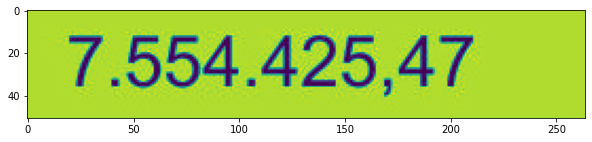

2012_3021_UTM_N.jpg
7.554.425,47
Type the test in the image:7.554.425,47
CER =  0.0
WER =  0.0


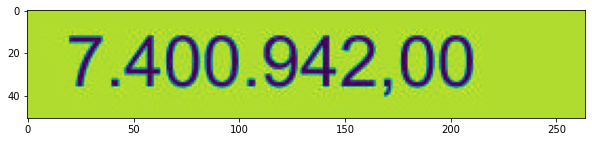

2012_2507_UTM_N.jpg
7.400.942,00
Type the test in the image:7.400.942,00
CER =  0.0
WER =  0.0


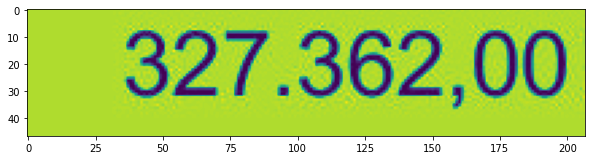

2012_2239_UTM_E.jpg
327.362,00
Type the test in the image:327.362,00
CER =  0.0
WER =  0.0


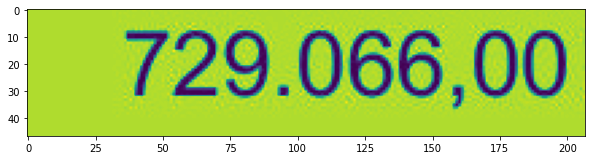

2012_762_UTM_E.jpg
729.066,00
Type the test in the image:729.066,00
CER =  0.0
WER =  0.0


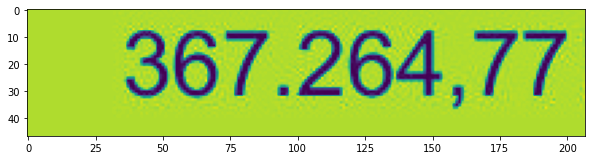

2012_4377_UTM_E.jpg
367.264,77
Type the test in the image:367.264,77
CER =  0.0
WER =  0.0


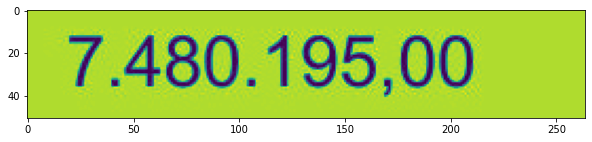

2012_3253_UTM_N.jpg
7.480.195,00
Type the test in the image:7.480.195,00
CER =  0.0
WER =  0.0


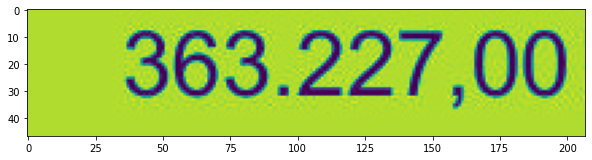

2012_1015_UTM_E.jpg
363.227,00
Type the test in the image:363.227,00
CER =  0.0
WER =  0.0


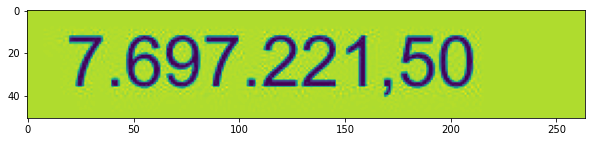

2012_4479_UTM_N.jpg
7.697.221,50
Type the test in the image:7.697.221,50
CER =  0.0
WER =  0.0


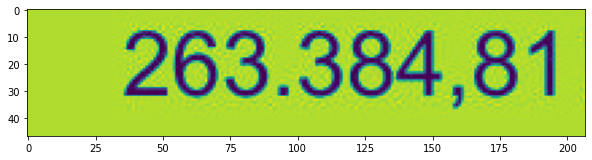

2012_1020_UTM_E.jpg
263.384,81
Type the test in the image:263.384,81
CER =  0.0
WER =  0.0


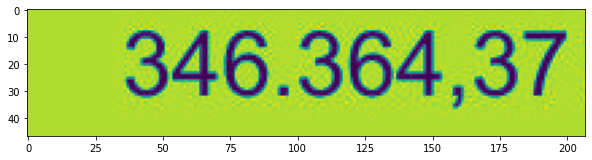

2012_2020_UTM_E.jpg
346.364,37
Type the test in the image:346.364,37
CER =  0.0
WER =  0.0


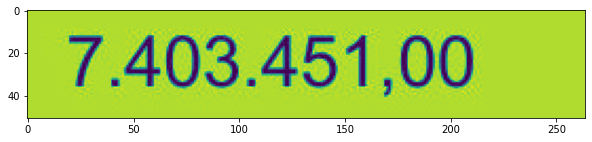

2012_3975_UTM_N.jpg
7.403.451,00
Type the test in the image:7.403.451,00
CER =  0.0
WER =  0.0


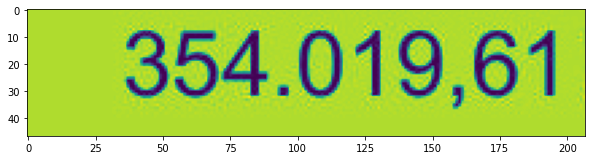

2012_2652_UTM_E.jpg
354.019,61
Type the test in the image:354.019,61
CER =  0.0
WER =  0.0


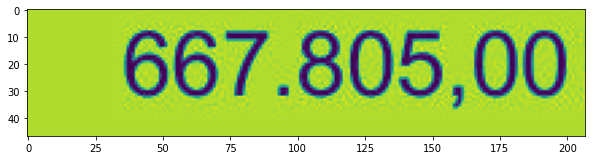

2012_1577_UTM_E.jpg
667.805,00
Type the test in the image:667.805,00
CER =  0.0
WER =  0.0


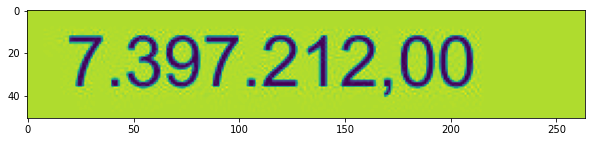

2012_1624_UTM_N.jpg
7.397.212,00
Type the test in the image:7.397.212,00
CER =  0.0
WER =  0.0


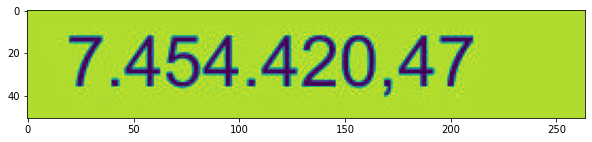

2012_3564_UTM_N.jpg
7.454.420,47
Type the test in the image:7.454.420,47
CER =  0.0
WER =  0.0


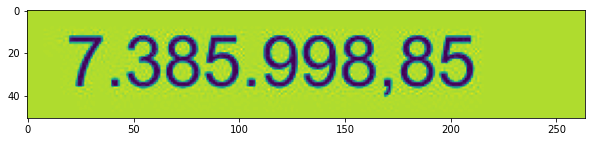

2012_3846_UTM_N.jpg
7.385.998,85
Type the test in the image:7.385.998,85
CER =  0.0
WER =  0.0


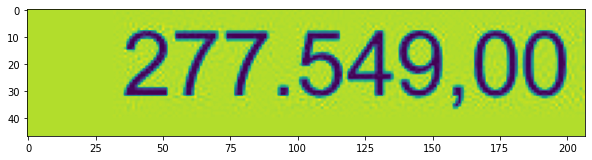

2012_2322_UTM_E.jpg
277.549,00
Type the test in the image:277.549,00
CER =  0.0
WER =  0.0


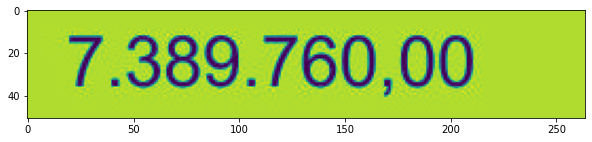

2012_3967_UTM_N.jpg
7.389.760,00
Type the test in the image:7.389.760,00
CER =  0.0
WER =  0.0


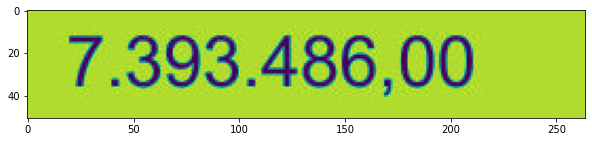

2012_3048_UTM_N.jpg
7.393.486,00
Type the test in the image:7.393.486,00
CER =  0.0
WER =  0.0


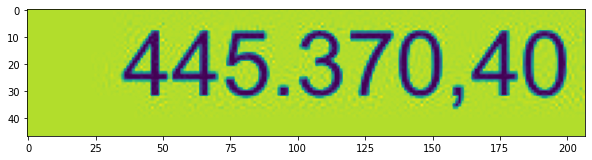

2012_3617_UTM_E.jpg
445.370,40
Type the test in the image:
CER =  inf
WER =  inf


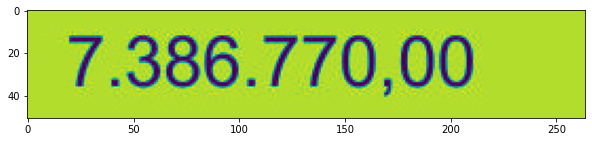

2012_2868_UTM_N.jpg
7.386.770,00
Type the test in the image:
CER =  inf
WER =  inf


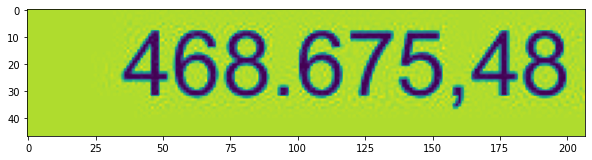

2012_3496_UTM_E.jpg
468.675,48
Type the test in the image:
CER =  inf
WER =  inf


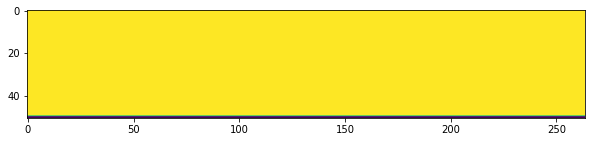

2012_1725_UTM_N.jpg

Type the test in the image:
CER =  nan
WER =  nan


ValueError: one or more references are empty strings

In [55]:



whitelist = "0123456789., "
cers = []
wers = []

deletions_list = []
substitutions_list = []
insertions_list = []

for f in random_elements: 
    ###### Load the image 
    path_img =  path + f

    img = cv2.imread(path_img,0)
#     img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    img = cv2.resize(img,(0,0),fx=1,fy=1)
#     denoised_img = cv2.fastNlMeansDenoising(img,None,9,13,11)
#     thresh = cv2.adaptiveThreshold(denoised_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 67, 0.1)

    plt.figure(figsize=(10,10))

    plt.imshow(img)
    plt.show()

    ###### OCR the image
    _,binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    ocr = pytesseract.image_to_string(binary,lang='por',config= f'-c tessedit_char_whitelist={whitelist}')
    ocr = ocr.strip('\n')
    print(f)
    print(ocr)
    
    ###### input the ground truth typed 

    ground_truth = input('Type the test in the image:')
    
    ##### Calculate CER 

    # Obtain Sentence-Level Character Error Rate (CER)
    cer = fastwer.score_sent(ocr, ground_truth, char_level=True)
    # wer = fastwer.score_sent(ocr, ground_truth)
    wer = fastwer.score_sent(ocr, ground_truth, char_level=False)
    # per_w = fastwer.score_sent(ocr, ground_truth, no_spaces=True)
    print('CER = ' ,cer)
    cers.append((f,cer))
    print('WER = ' ,wer)
    wers.append((f,wer))
    # Calculation of the number of deletion, substitution and insertion
    out = jiwer.compute_measures(ocr, ground_truth)
    deletions = out['deletions']
    deletions_list.append((f,deletions))
    substitutions = out['substitutions']
    substitutions_list.append((f,substitutions))
    insertions = out['insertions']
    insertions_list.append((f,insertions))
    
cer = dict(cers)
wer = dict(wers)
deletions = dict(deletions_list)
substitutions = dict(substitutions_list)
insertions = dict(insertions_list)

In [36]:
deletions

{'2012_1312_Address.jpg': 1}

In [39]:
cer = dict(cers)
wer = dict(wers)
deletions = dict(deletions_list)
substitutions = dict(substitutions_list)
insertions = dict(insertions_list)

In [40]:
# for key, value in cer.items():
#     if value == float('inf') or value == float('-inf'):
#         del cer[key]



cers_val = cer.values()
cer_txt_less90 = sum(cers_val) / len(cers_val)
cer_txt_less90

1.5667639639639641

In [41]:
print(max(cers_val))

7.6923


In [42]:

def get_key_by_value(value, dictionary):
    for key, val in dictionary.items():
        if val == value:
            return key
    return None

float_number = 7.6923
key = get_key_by_value(float_number, cer)

print(key)  # Output: 'b'



2012_855_Address.jpg


In [27]:
# for key, value in wer.items():
#     if value == float('inf') or value == float('-inf'):
#         del wer[key]










wers_val = wer.values()
wer_txt_less90 = sum(wers_val) / len(wers_val)
wer_txt_less90

6.227095127834056

In [43]:
insertions_val = insertions.values()
insertions_txt_less90 = sum(insertions_val)
insertions_txt_less90

12

In [45]:
deletions_val = deletions.values()
deletions_txt_less90 = sum(deletions_val)
deletions_txt_less90

34

In [46]:
substitutions_val = substitutions.values()
substitutions_txt_less90 = sum(substitutions_val)
substitutions_txt_less90

32

In [44]:
len(insertions_val)

111